In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
def check_missing_data(df):
    total = df.isnull().sum()
    percent = ((df.isnull().sum()/len(df)).round(3) *100)
    table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return table[table.iloc[:, 1] > 0].sort_values('Percent', ascending=False)

def check_most_freq_values(df):
    percentages = []
    for col in df.columns:
        percent = df[col].value_counts(normalize=True)
        percentages.append(percent.iloc[0]*100)
    return pd.DataFrame(percentages, index = df.columns, 
                        columns = ['Percentage of most freq values']).sort_values(by=['Percentage of most freq values'])

các hàm này chỉ mang tính chất tham khảo vì khi merge lại với bảng application số lượng null / freq / unique có thể thay đổi

# 1. BUREAU

In [4]:
bureau = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau.csv')
print(bureau.shape)
bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [9]:
br = bureau[bureau.columns[~bureau.columns.isin(['SK_ID_BUREAU','SK_ID_CURR'])]]

In [10]:
check_missing_data(br)

,Total,Percent
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1


In [11]:
check_most_freq_values(br)

,Percentage of most freq values
DAYS_CREDIT_ENDDATE,0.054815
DAYS_ENDDATE_FACT,0.074900
DAYS_CREDIT,0.077487
DAYS_CREDIT_UPDATE,1.077995
AMT_CREDIT_SUM,3.879132
AMT_ANNUITY,52.470504
CREDIT_ACTIVE,62.879014
AMT_CREDIT_SUM_DEBT,69.677993
CREDIT_TYPE,72.919750
AMT_CREDIT_MAX_OVERDUE,79.509748


In [13]:
temp = br.describe(include=["object", "category"])
cat_cols = temp.columns
temp

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


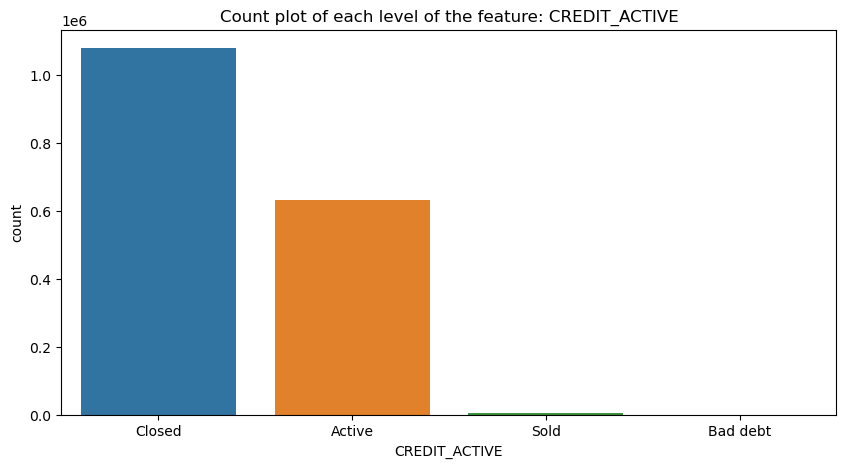

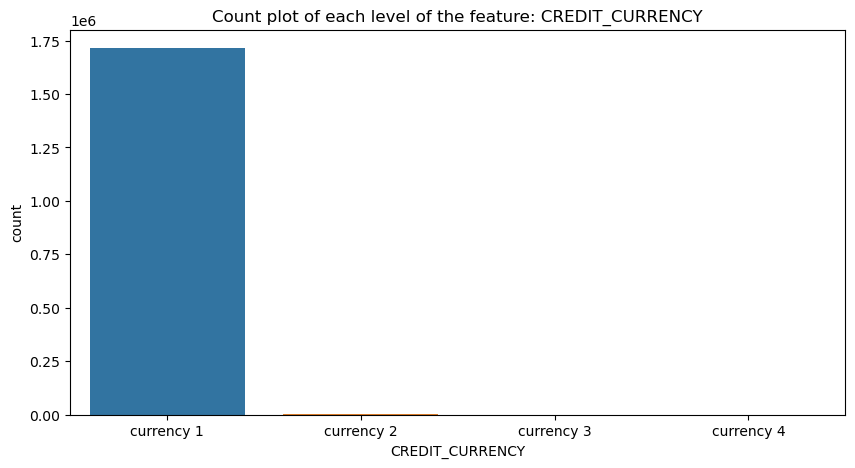

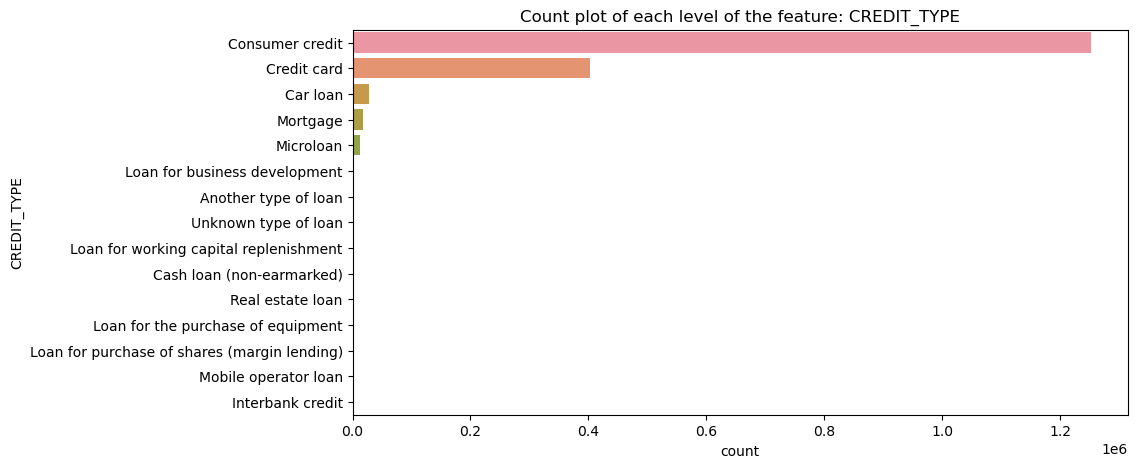

In [14]:
for feature in cat_cols: 
    fig, ax = plt.subplots(figsize = (10, 5))
    # Plot levels distribution
    if br[feature].nunique() < 10: 
        sns.countplot(data = br, x  = feature, order = br[feature].value_counts().index.tolist())
    else: 
        sns.countplot(data = br, y = feature, order = br[feature].value_counts().index.tolist())
    ax.set_title("Count plot of each level of the feature: " + feature)

/tmp/ipykernel_32/673990160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(br[feature])
/tmp/ipykernel_32/673990160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(br[feature])
/tmp/ipykernel_32/673990160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in se

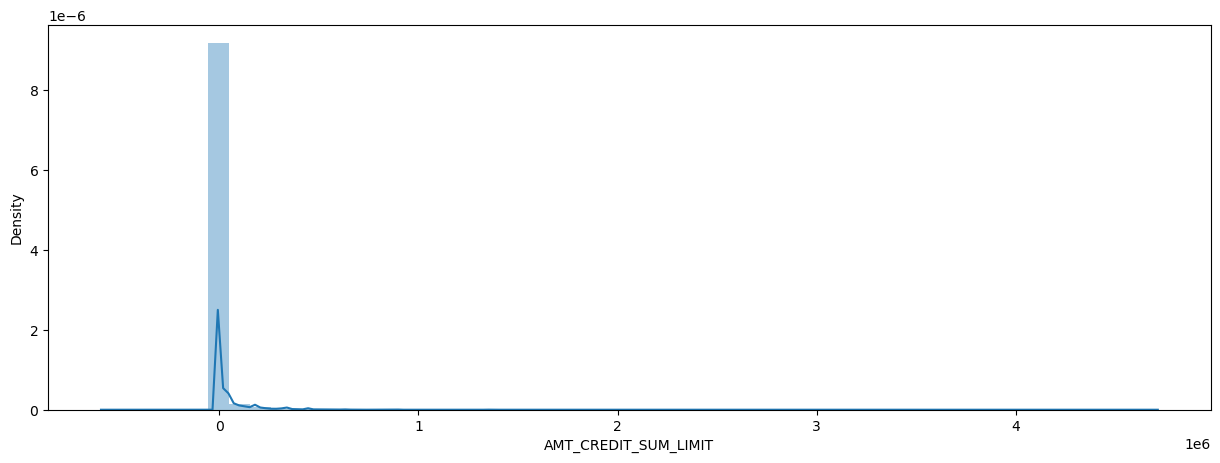

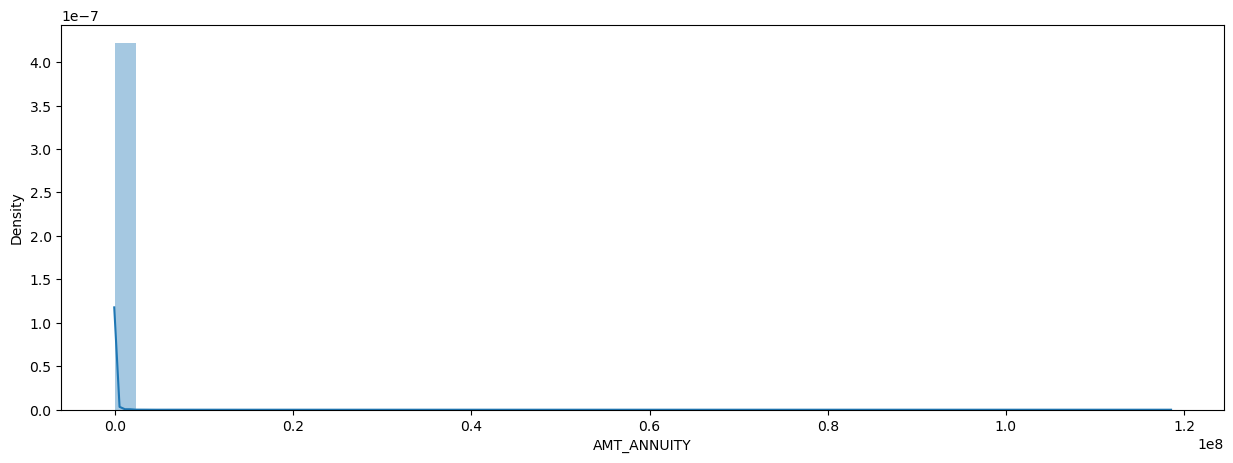

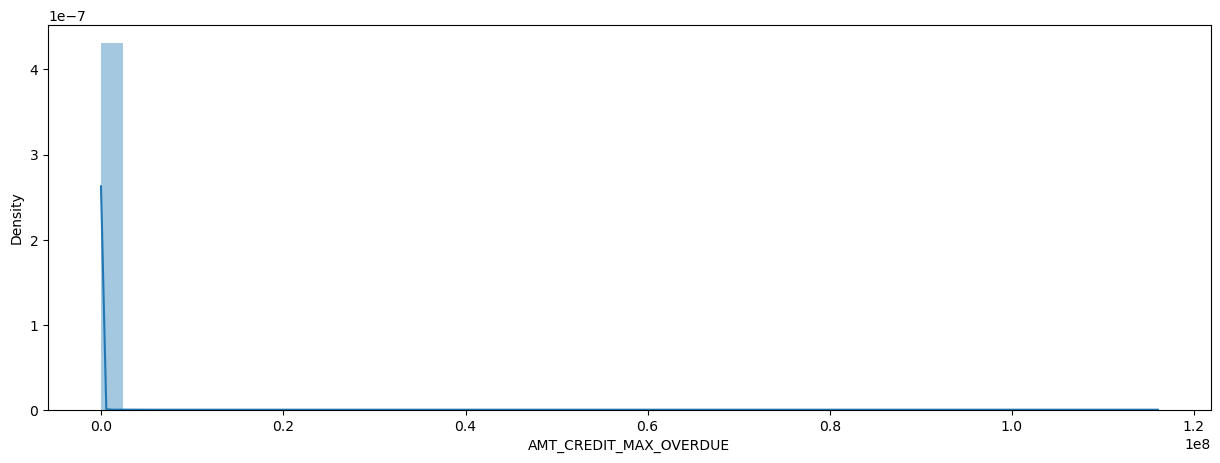

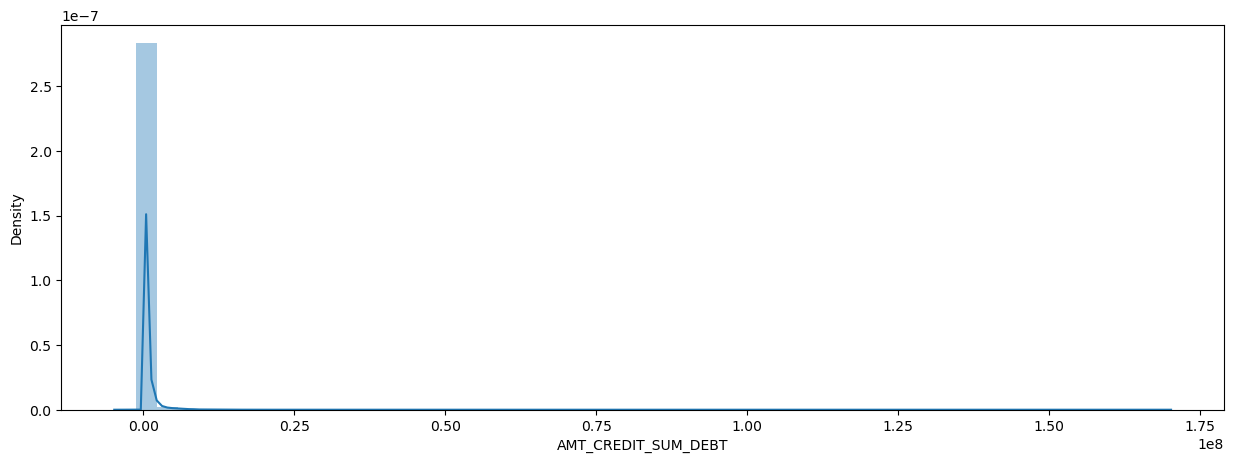

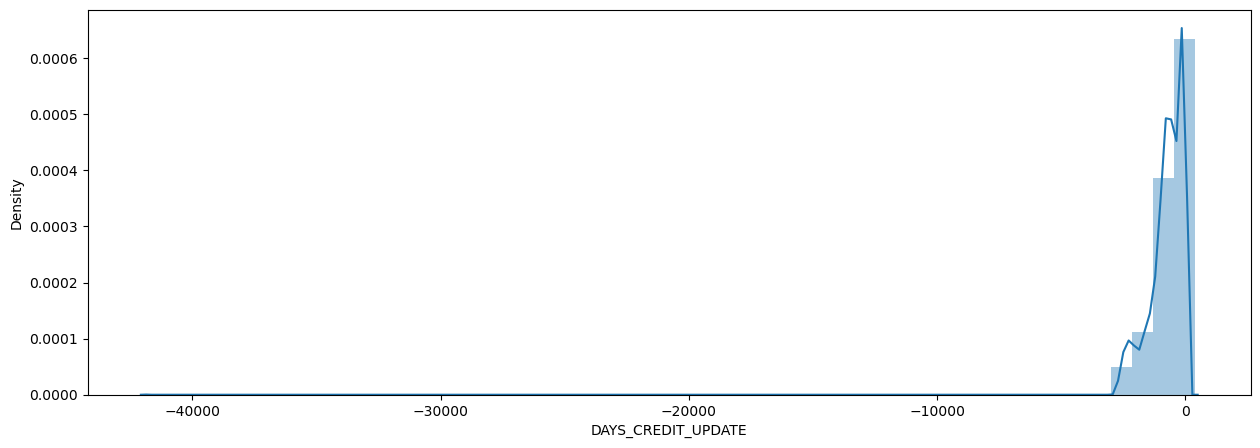

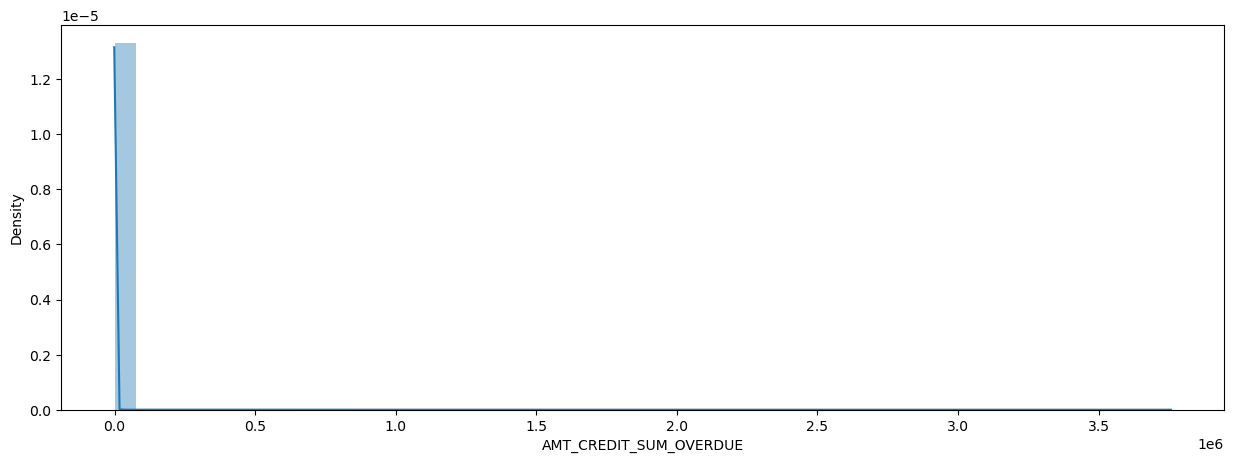

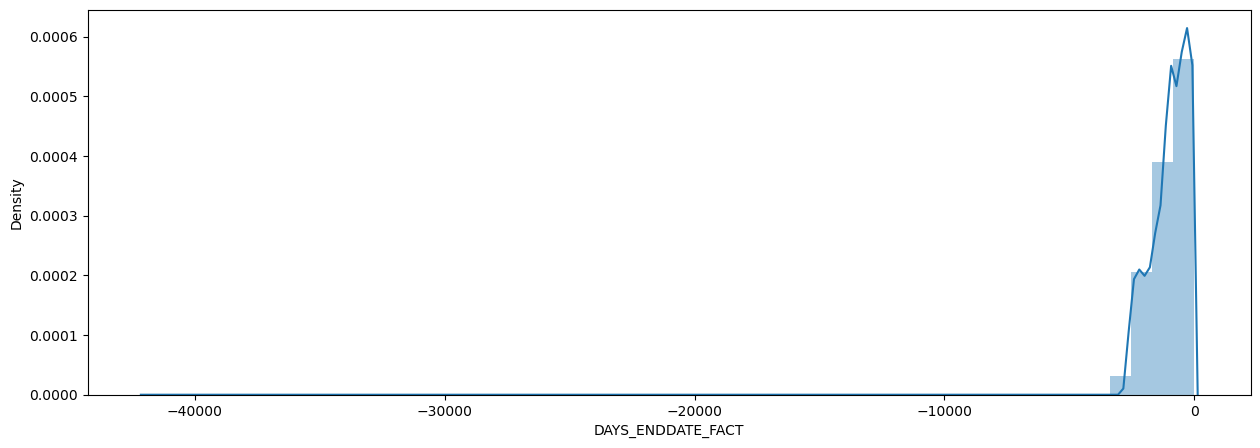

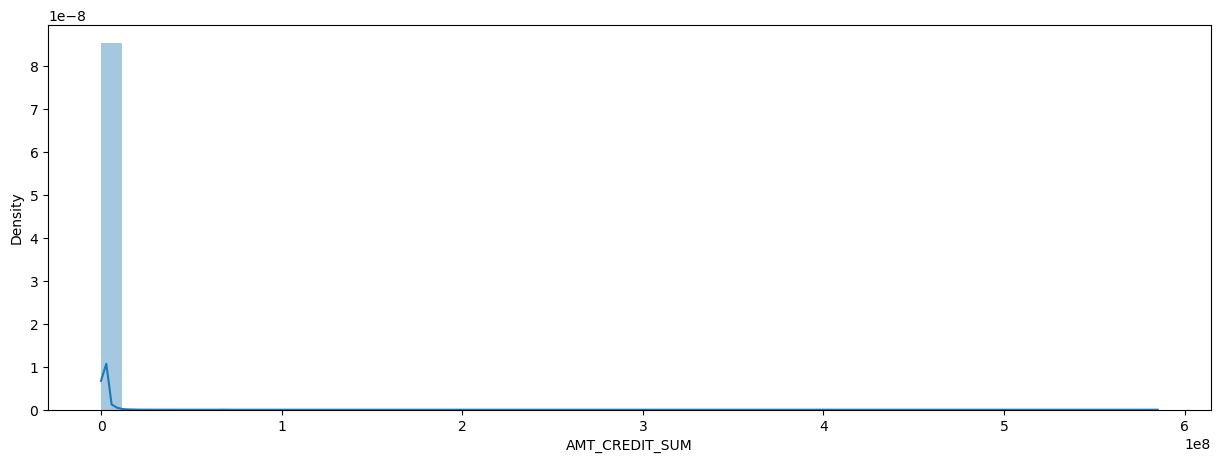

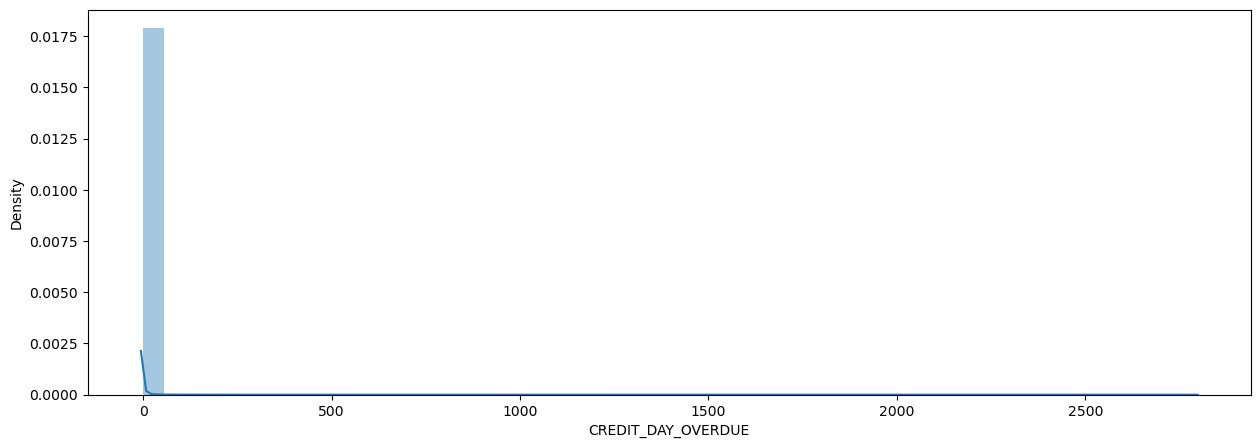

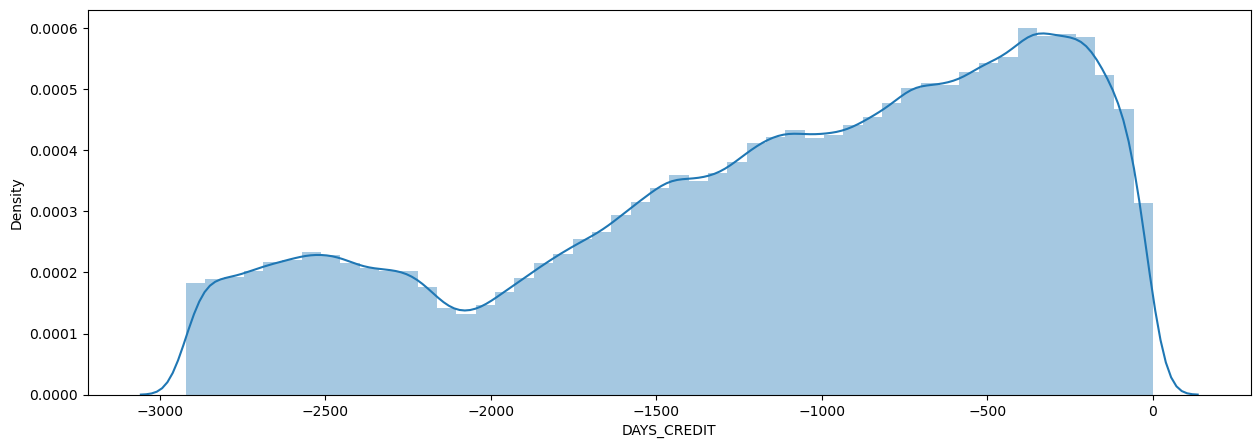

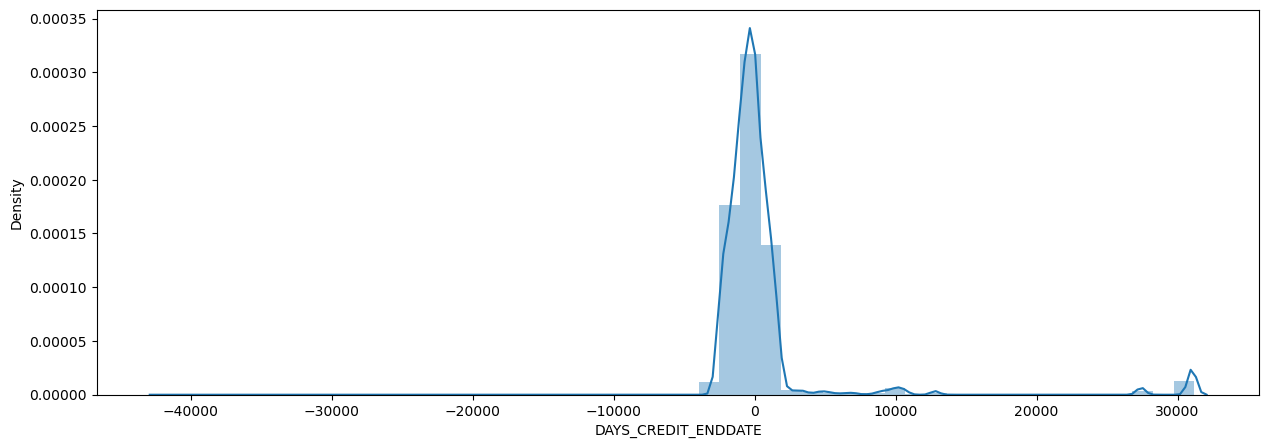

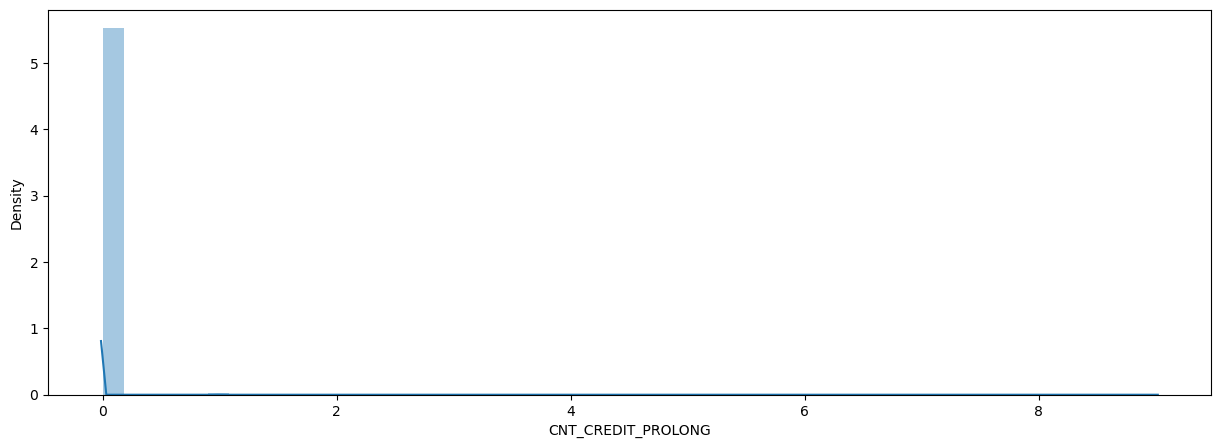

In [16]:
num_cols = list(set(br.columns).difference(cat_cols))
for feature in num_cols:
    fig, ax = plt.subplots(figsize=(15,5))
    sns.distplot(br[feature])

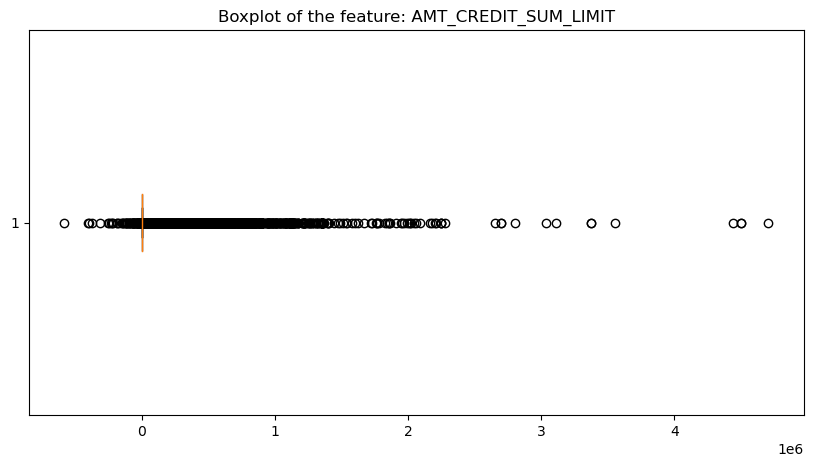

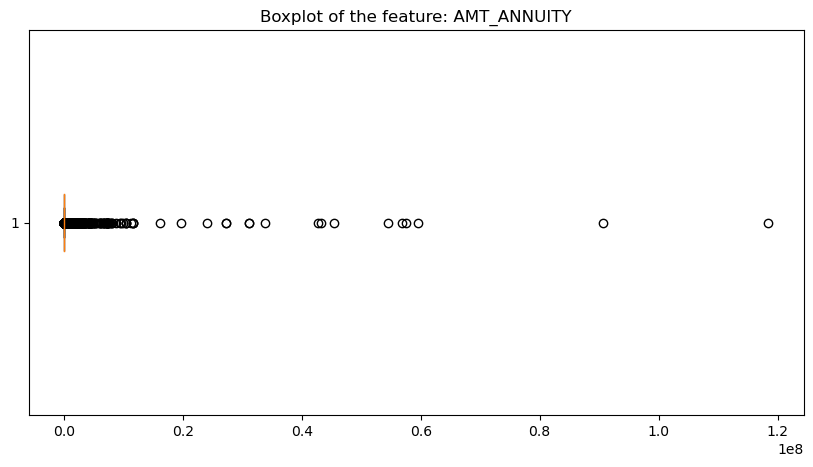

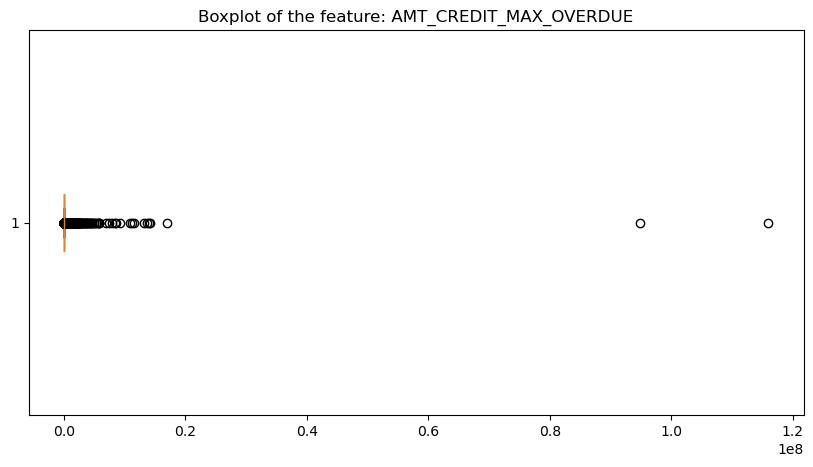

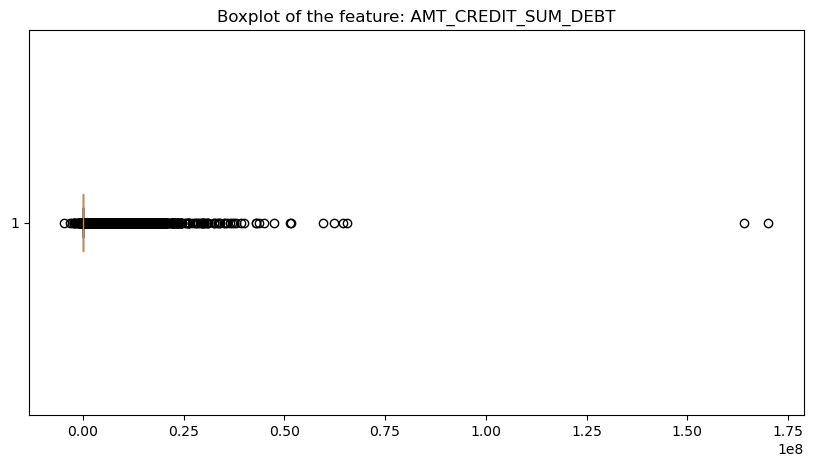

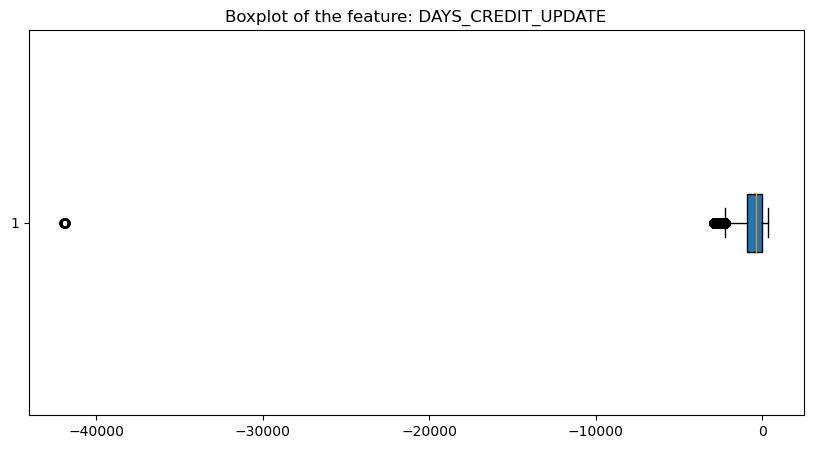

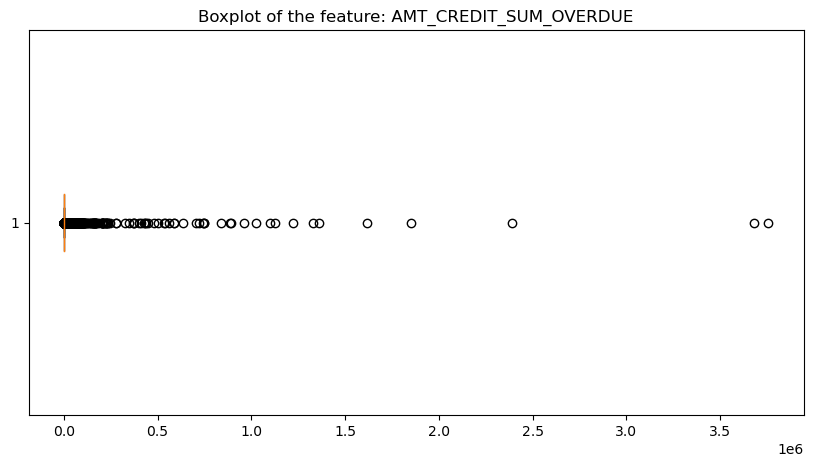

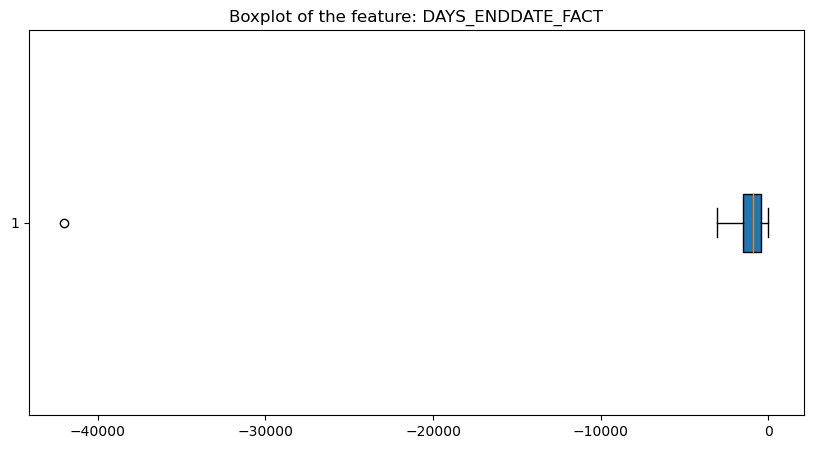

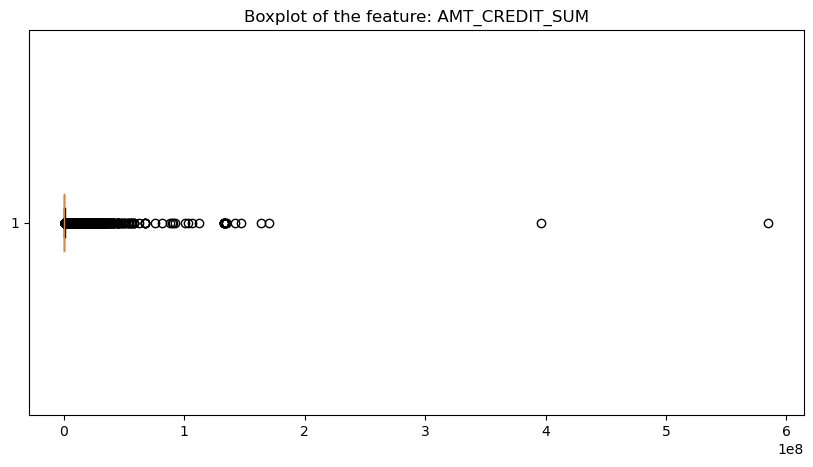

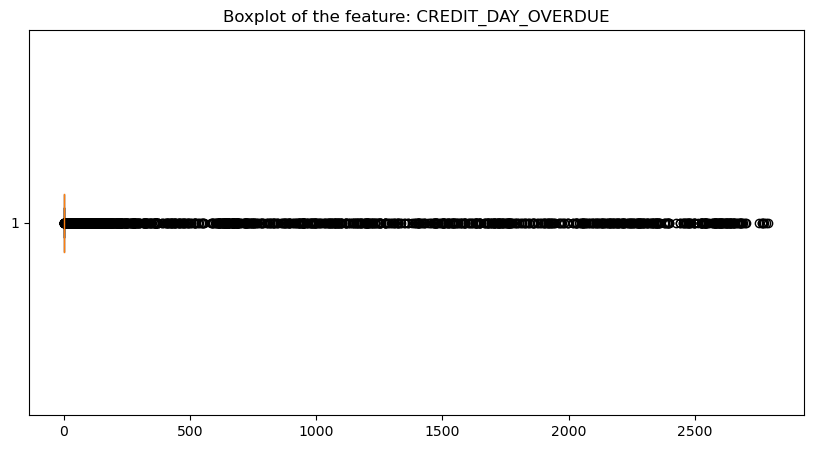

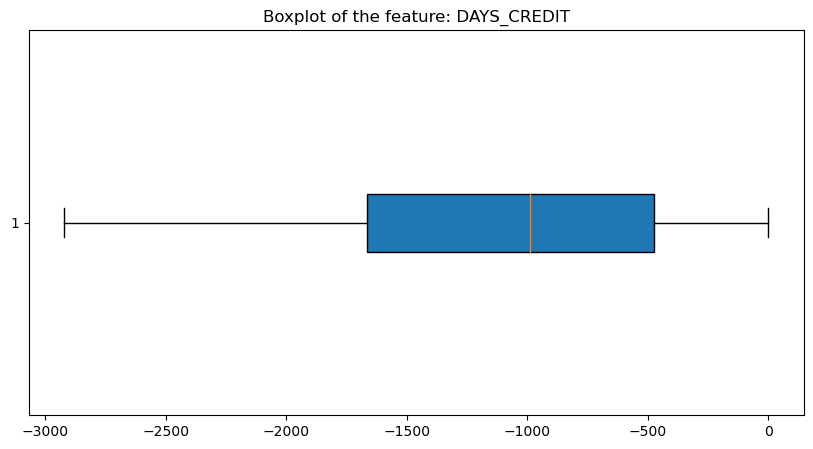

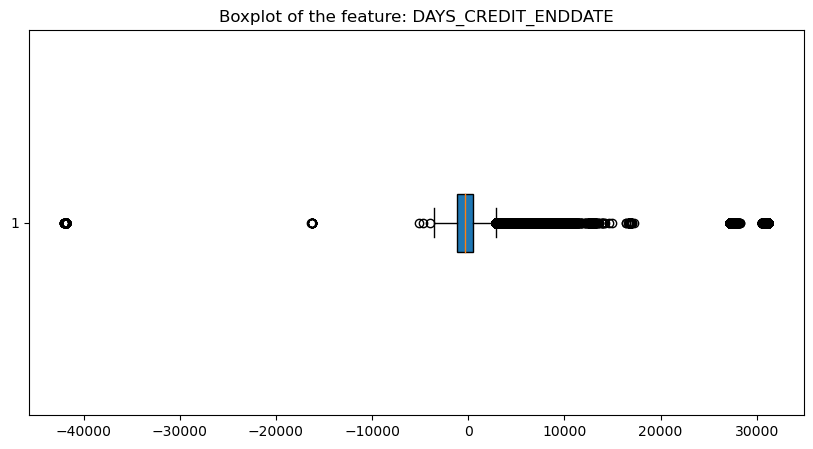

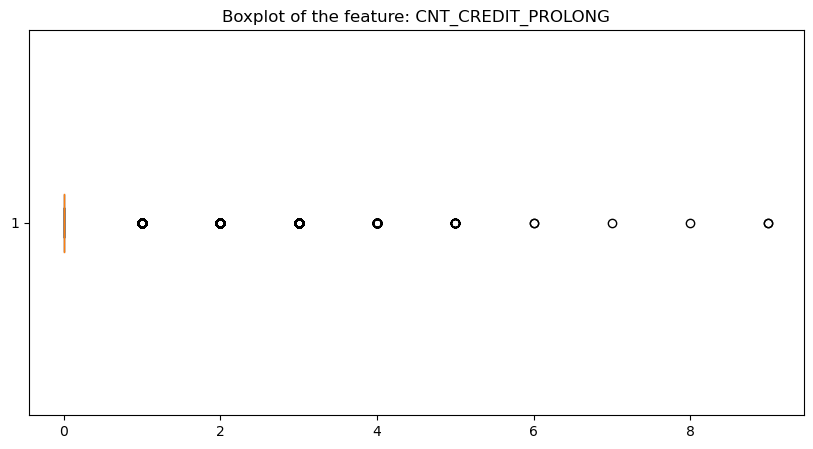

In [19]:
for feature in num_cols:
    fig, ax = plt.subplots(figsize=(10,5))
    plt.boxplot(br[feature].dropna(), patch_artist =True, vert = False)
    ax.set_title("Boxplot of the feature: " + feature)

Text(0.5, 1.0, 'Correlation plot between numerical features')

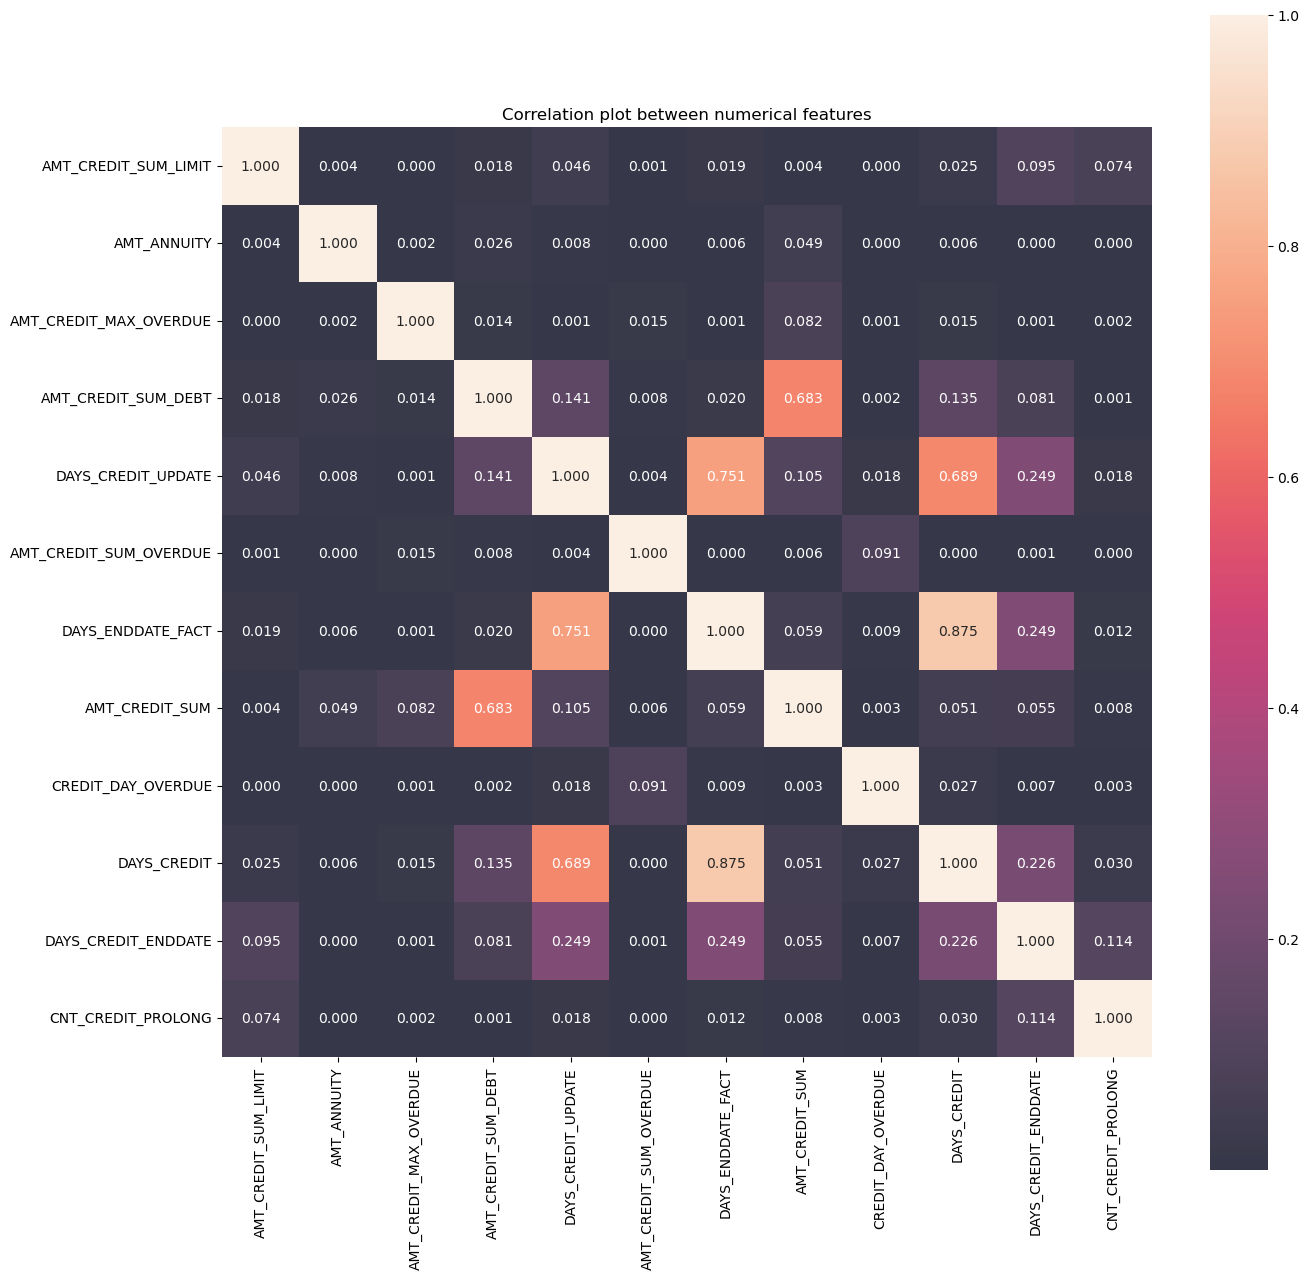

In [23]:
plt.figure(figsize = (15, 15))
sns.heatmap(abs(br[num_cols].corr()), annot = True, cmap="rocket" , alpha = 0.8 , fmt = ".3f", square = True)
plt.title("Correlation plot between numerical features")

the correlation is low, there not any very high --> oke

# 2. BUREAU BALANCE

In [25]:
bureau_balance = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau_balance.csv')
print(bureau_balance.shape)
bureau_balance.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


# 3. INSTALLMENTS_PAYMENTS

In [4]:
installments_payments = pd.read_csv('/kaggle/input/home-credit-default-risk/installments_payments.csv')
print(installments_payments.shape)
installments_payments.head()

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [17]:
ins_pay = installments_payments.drop(columns = ['SK_ID_PREV', 'SK_ID_CURR'])
(ins_pay.isna().sum()/ins_pay.shape[0]*100)

NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.021352
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.021352
dtype: float64

<Axes: >

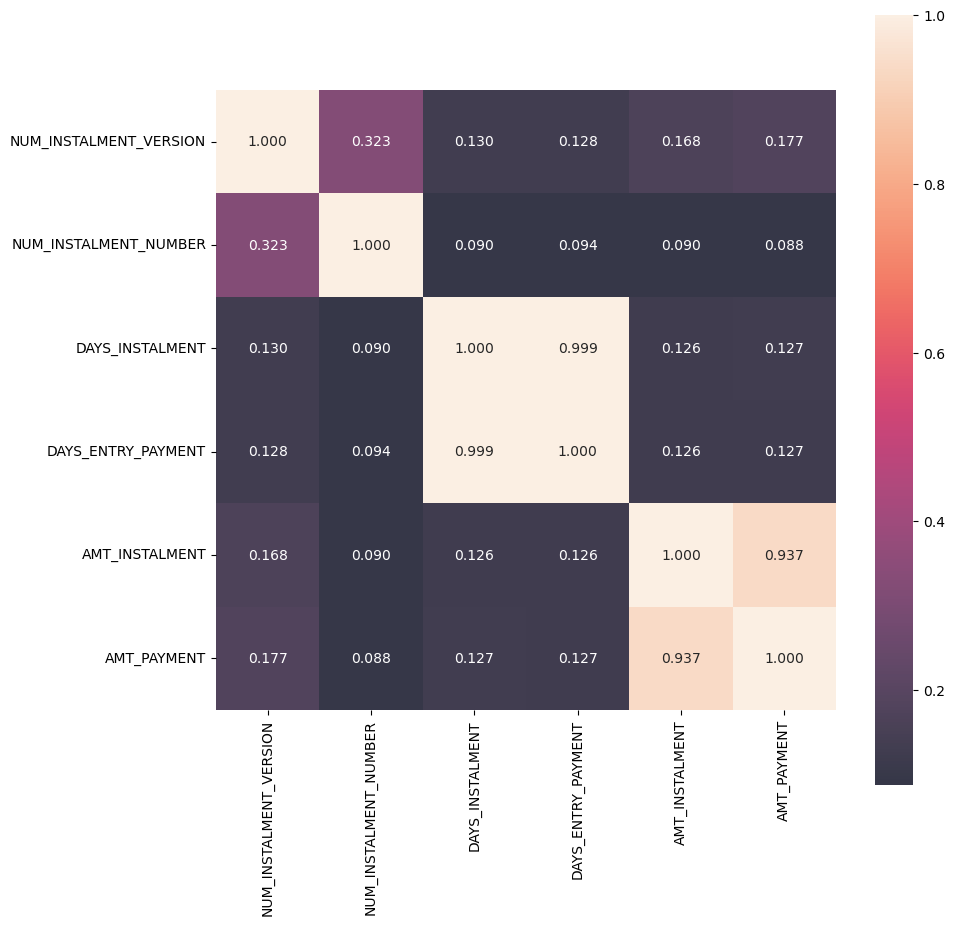

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(abs(ins_pay.corr()), annot = True, cmap="rocket" , alpha = 0.8 , fmt = ".3f", square = True)

/tmp/ipykernel_32/1019205788.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_pay[feature])
/tmp/ipykernel_32/1019205788.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_pay[feature])
/tmp/ipykernel_32/1019205788.py:3: UserWarning: 

`distplot` is a deprecated function and will be 

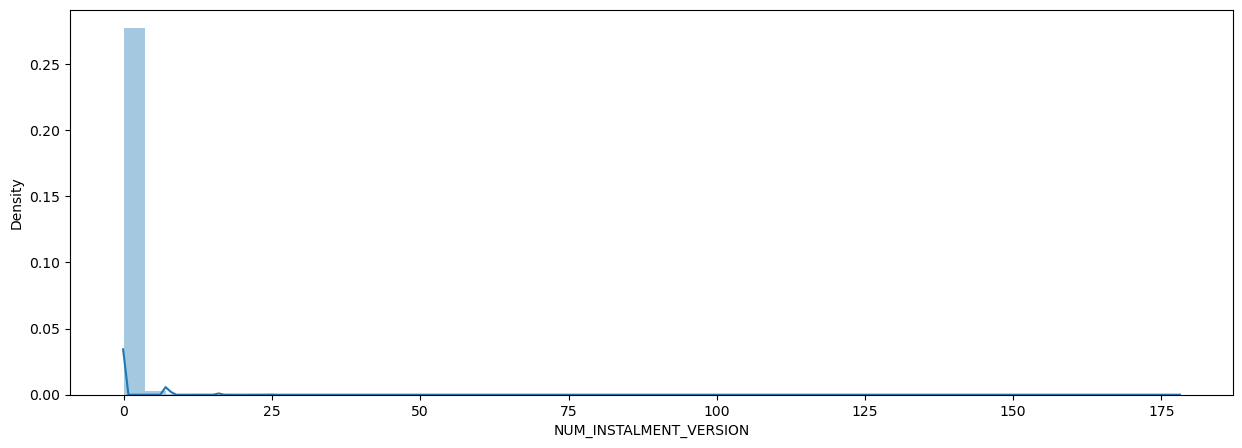

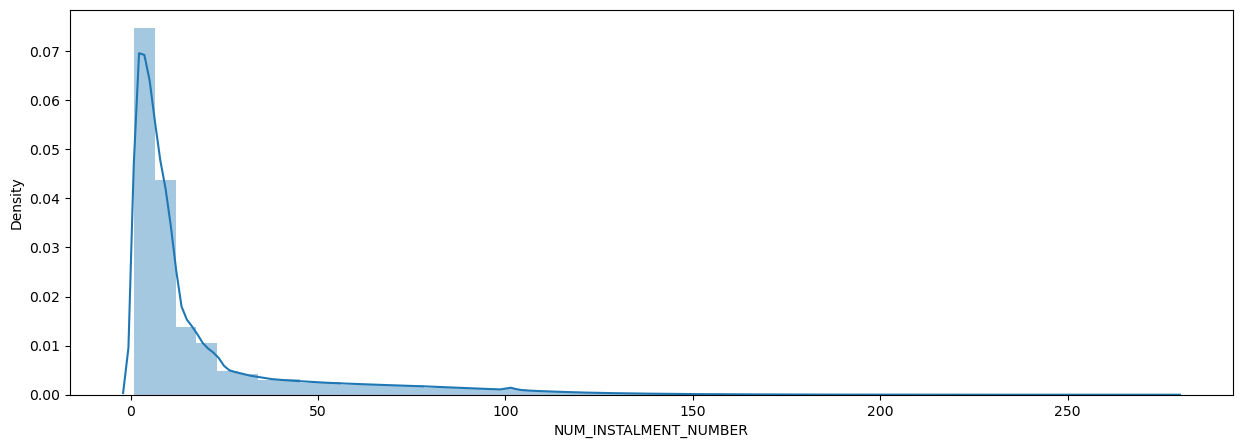

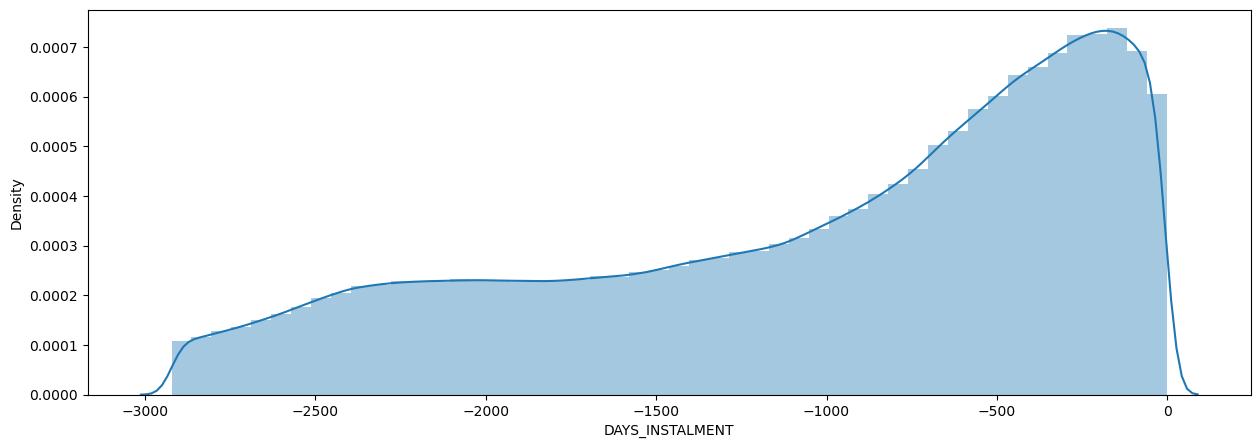

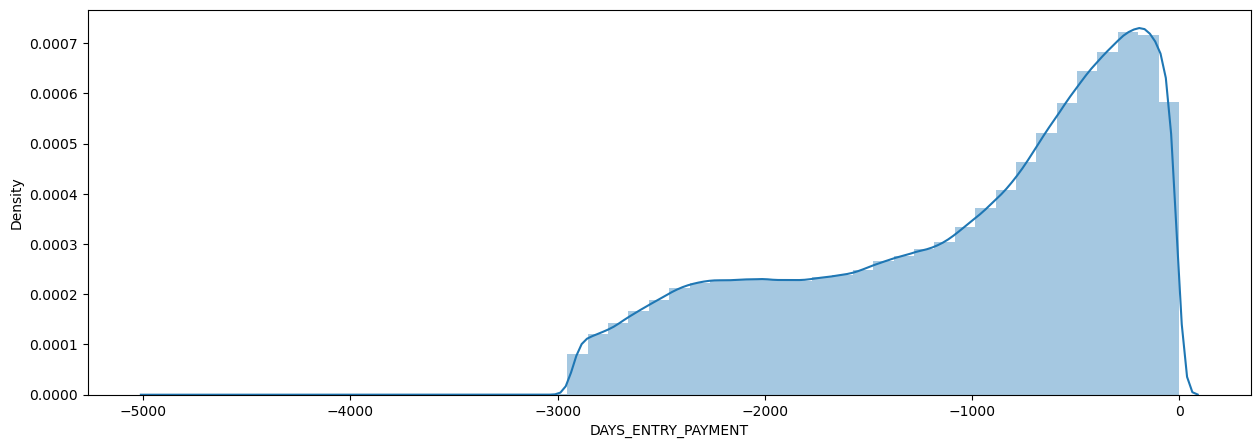

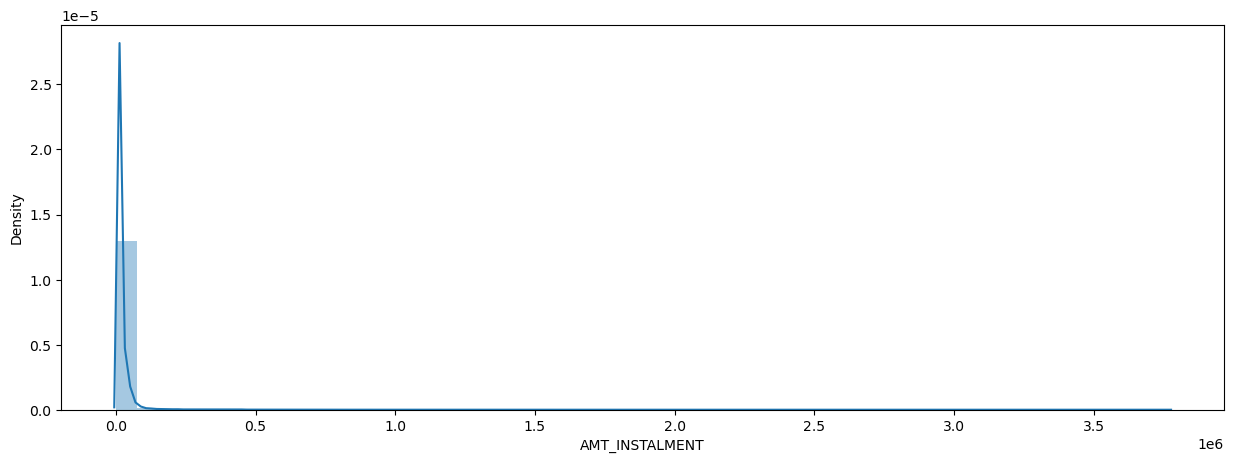

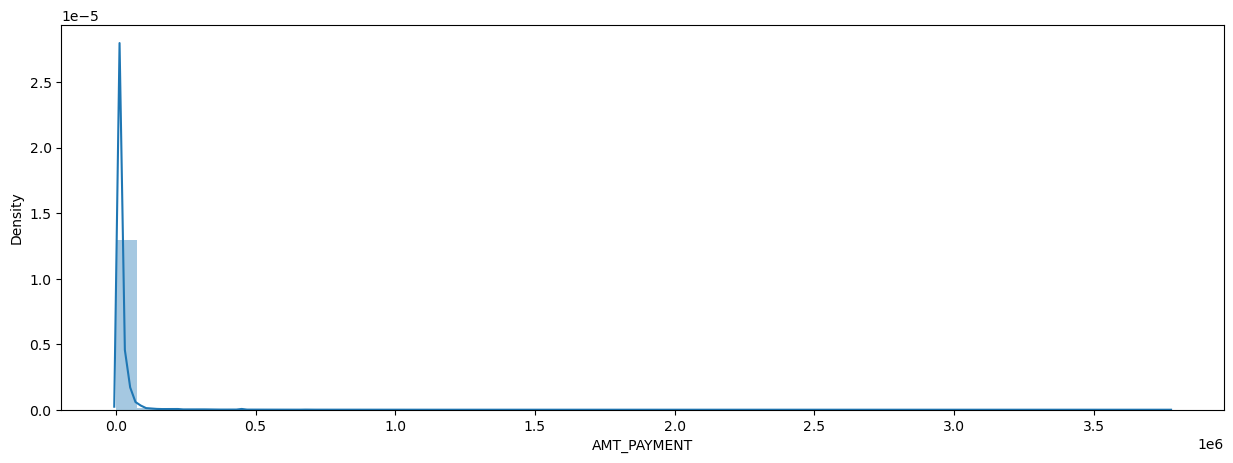

In [19]:
for feature in ins_pay:
    fig, ax = plt.subplots(figsize=(15,5))
    sns.distplot(ins_pay[feature])

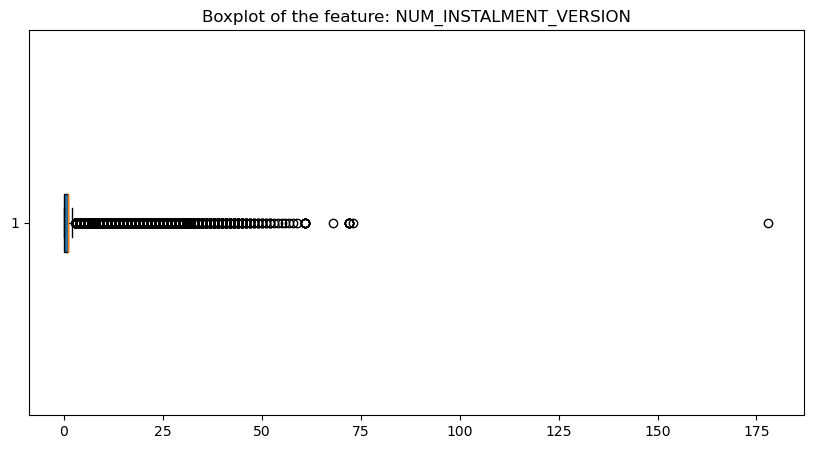

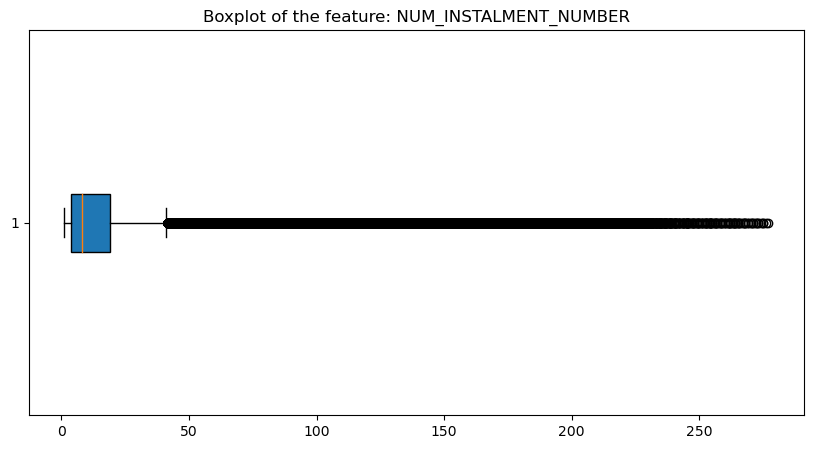

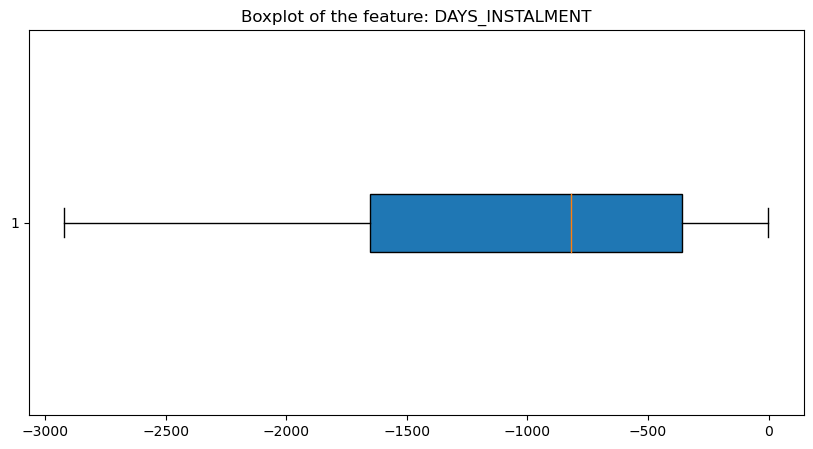

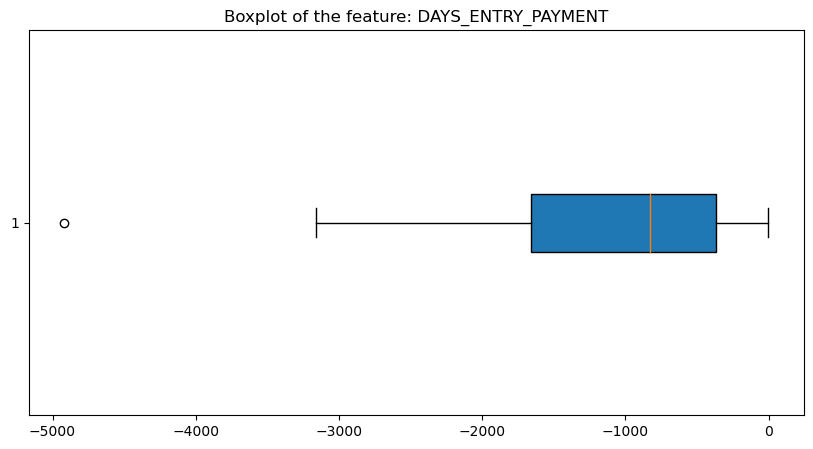

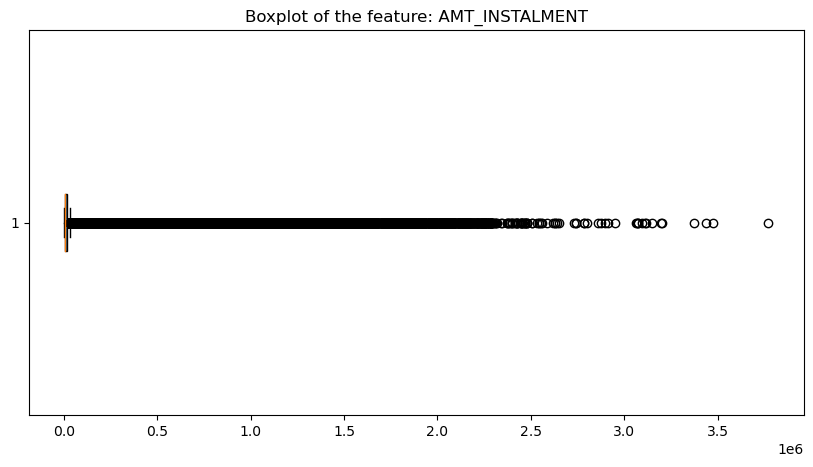

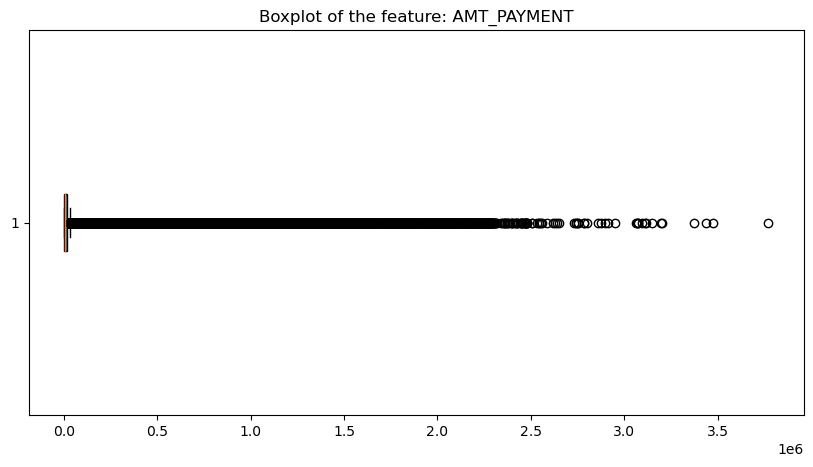

In [20]:
for feature in ins_pay:
    fig, ax = plt.subplots(figsize=(10,5))
    plt.boxplot(ins_pay[feature].dropna(), patch_artist =True, vert = False)
    ax.set_title("Boxplot of the feature: " + feature)

# 4. CREDIT CARD BALANCE

In [3]:
credit_card_balance = pd.read_csv('/kaggle/input/home-credit-default-risk/credit_card_balance.csv')
print(credit_card_balance.shape)
credit_card_balance.head()

(3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [4]:
cc_bal = credit_card_balance.drop(columns = ['SK_ID_PREV', 'SK_ID_CURR', 'SK_DPD', 'SK_DPD_DEF'])
cc_bal.describe()

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM
count,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06
mean,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01
std,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01
min,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01
75%,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01
max,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02


In [5]:
check_missing_data(cc_bal)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


In [6]:
cc_bal["NAME_CONTRACT_STATUS"].value_counts(normalize=True)

Active           0.963056
Completed        0.033570
Signed           0.002879
Demand           0.000355
Sent proposal    0.000134
Refused          0.000004
Approved         0.000001
Name: NAME_CONTRACT_STATUS, dtype: float64

/tmp/ipykernel_32/944033784.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(cc_bal.corr()), annot = True, cmap="rocket" , alpha = 0.8 , fmt = ".3f", square = True)


<Axes: >

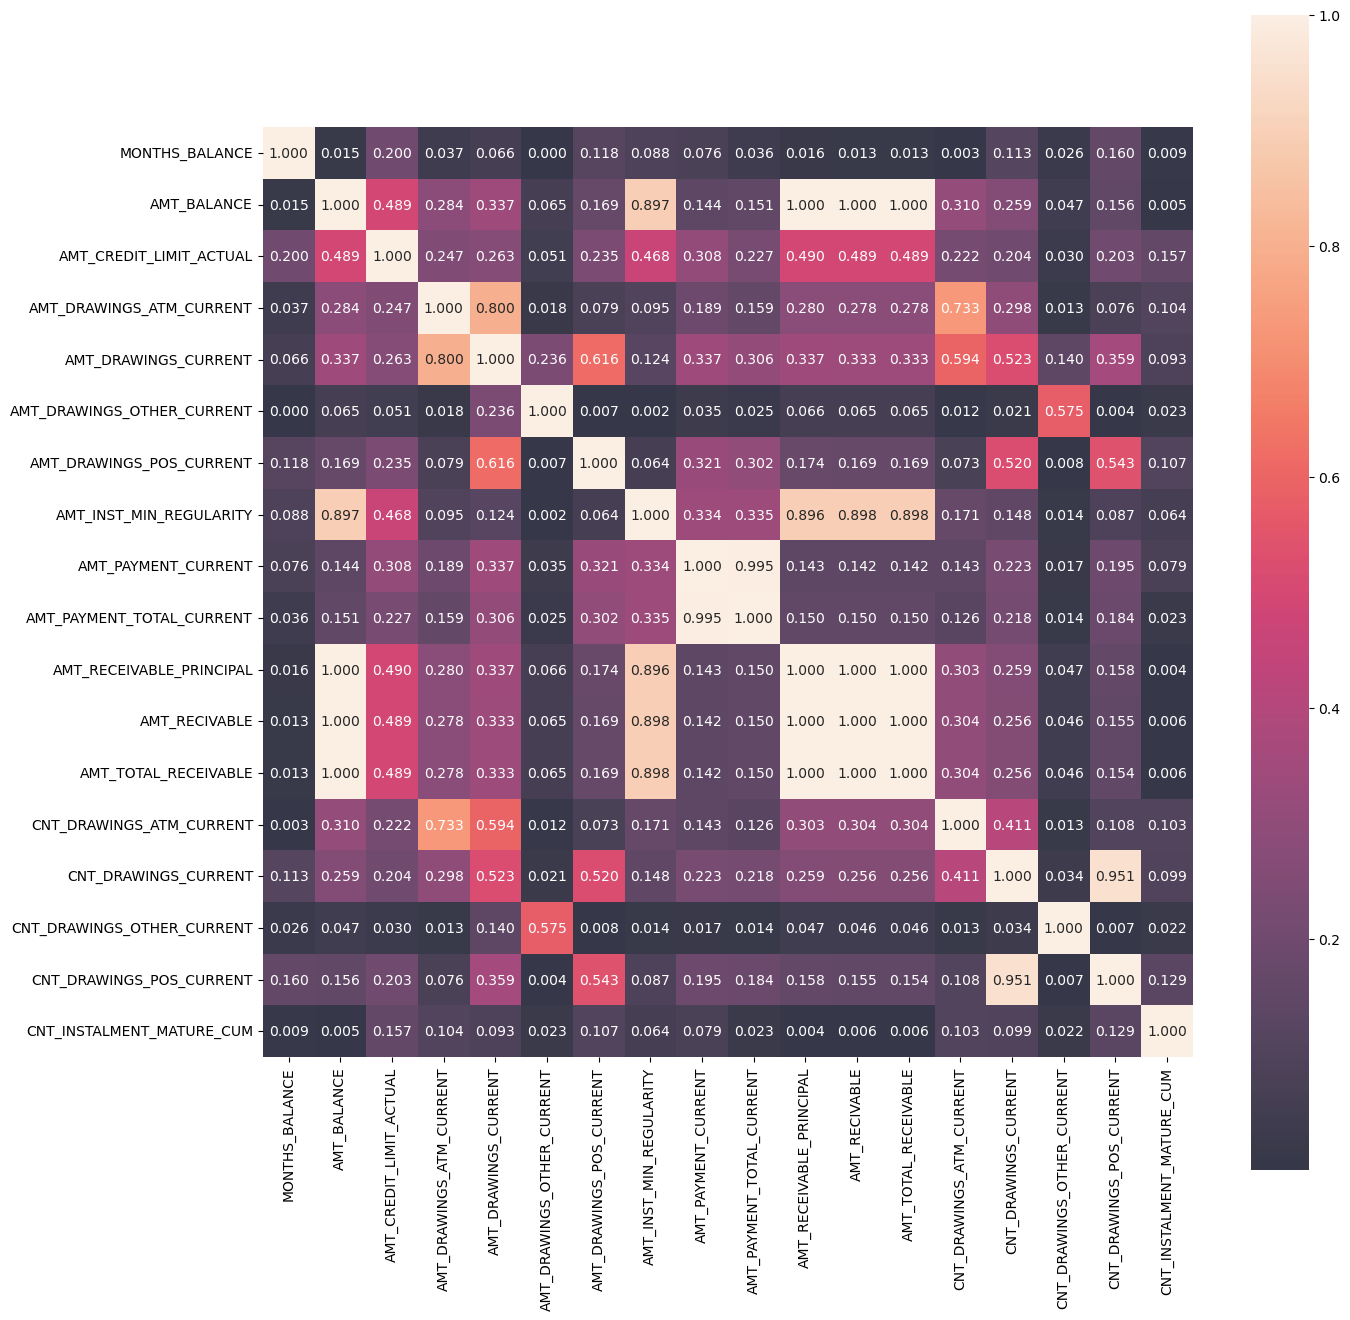

In [7]:
plt.figure(figsize = (15,15))
sns.heatmap(abs(cc_bal.corr()), annot = True, cmap="rocket" , alpha = 0.8 , fmt = ".3f", square = True)

### DROP 
#### due to high correlation: 
AMT_PAYMENT_CURRENT

AMT_RECEIVABLE_PRINCIPAL

AMT_RECIVABLE

AMT_BALANCE

CNT_DRAWINGS_POS_CURRENT

#### due to outliers / unique values
CNT_DRAWINGS_OTHER_CURRENT

CNT_DRAWINGS_ATM_CURRENT

AMT_DRAWINGS_POS_CURRENT

AMT_DRAWINGS_OTHER_CURRENT

AMT_DRAWINGS_ATM_CURRENT

In [42]:
cc_bal['AMT_DRAWINGS_POS_CURRENT'].describe(percentiles=np.arange(.8, 1, .05))

count    3.090496e+06
mean     2.968805e+03
std      2.079689e+04
min      0.000000e+00
50%      0.000000e+00
80%      0.000000e+00
85%      0.000000e+00
90%      0.000000e+00
95%      1.011600e+04
max      2.239274e+06
Name: AMT_DRAWINGS_POS_CURRENT, dtype: float64

# 5. POS_CASH BALANCE

In [43]:
pos_cash_balance = pd.read_csv('/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv')
print(pos_cash_balance.shape)
pos_cash_balance.head()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [50]:
pos_cash_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [49]:
pos_cash_balance[['SK_DPD', 'SK_DPD_DEF']].describe(percentiles=np.arange(.98, 1, .005))

,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07
mean,1.160693e+01,6.544684e-01
std,1.327140e+02,3.276249e+01
min,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
98%,8.000000e+00,0.000000e+00
98.5%,1.800000e+01,0.000000e+00
99%,2.350000e+02,1.000000e+00
99.5%,9.130000e+02,5.000000e+00
100%,4.231000e+03,3.595000e+03


In [51]:
check_missing_data(pos_cash_balance)

,Total,Percent
CNT_INSTALMENT,26071,0.3
CNT_INSTALMENT_FUTURE,26087,0.3


### DROP: 
SK_DPD

SK_DPD_DEF

# 6. PREVIOUS APPLICATION

In [52]:
pre_app = pd.read_csv('/kaggle/input/home-credit-default-risk/previous_application.csv')
print(pre_app.shape)
pre_app.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
check_missing_data(pre_app)

,Total,Percent
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


In [55]:
check_most_freq_values(pre_app)[-10:]

,Percentage of most freq values
NAME_TYPE_SUITE,59.892282
NAME_PAYMENT_TYPE,61.881412
NAME_CONTRACT_STATUS,62.074740
NAME_PRODUCT_TYPE,63.684414
NFLAG_INSURED_ON_APPROVAL,66.742984
NAME_CLIENT_TYPE,73.718757
CODE_REJECT_REASON,81.013152
DAYS_FIRST_DRAWING,93.711572
FLAG_LAST_APPL_PER_CONTRACT,99.492580
NFLAG_LAST_APPL_IN_DAY,99.646752


/tmp/ipykernel_32/55904335.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(pre_app.corr()), annot = True, cmap="rocket" , alpha = 0.8 , fmt = ".3f", square = True)


<Axes: >

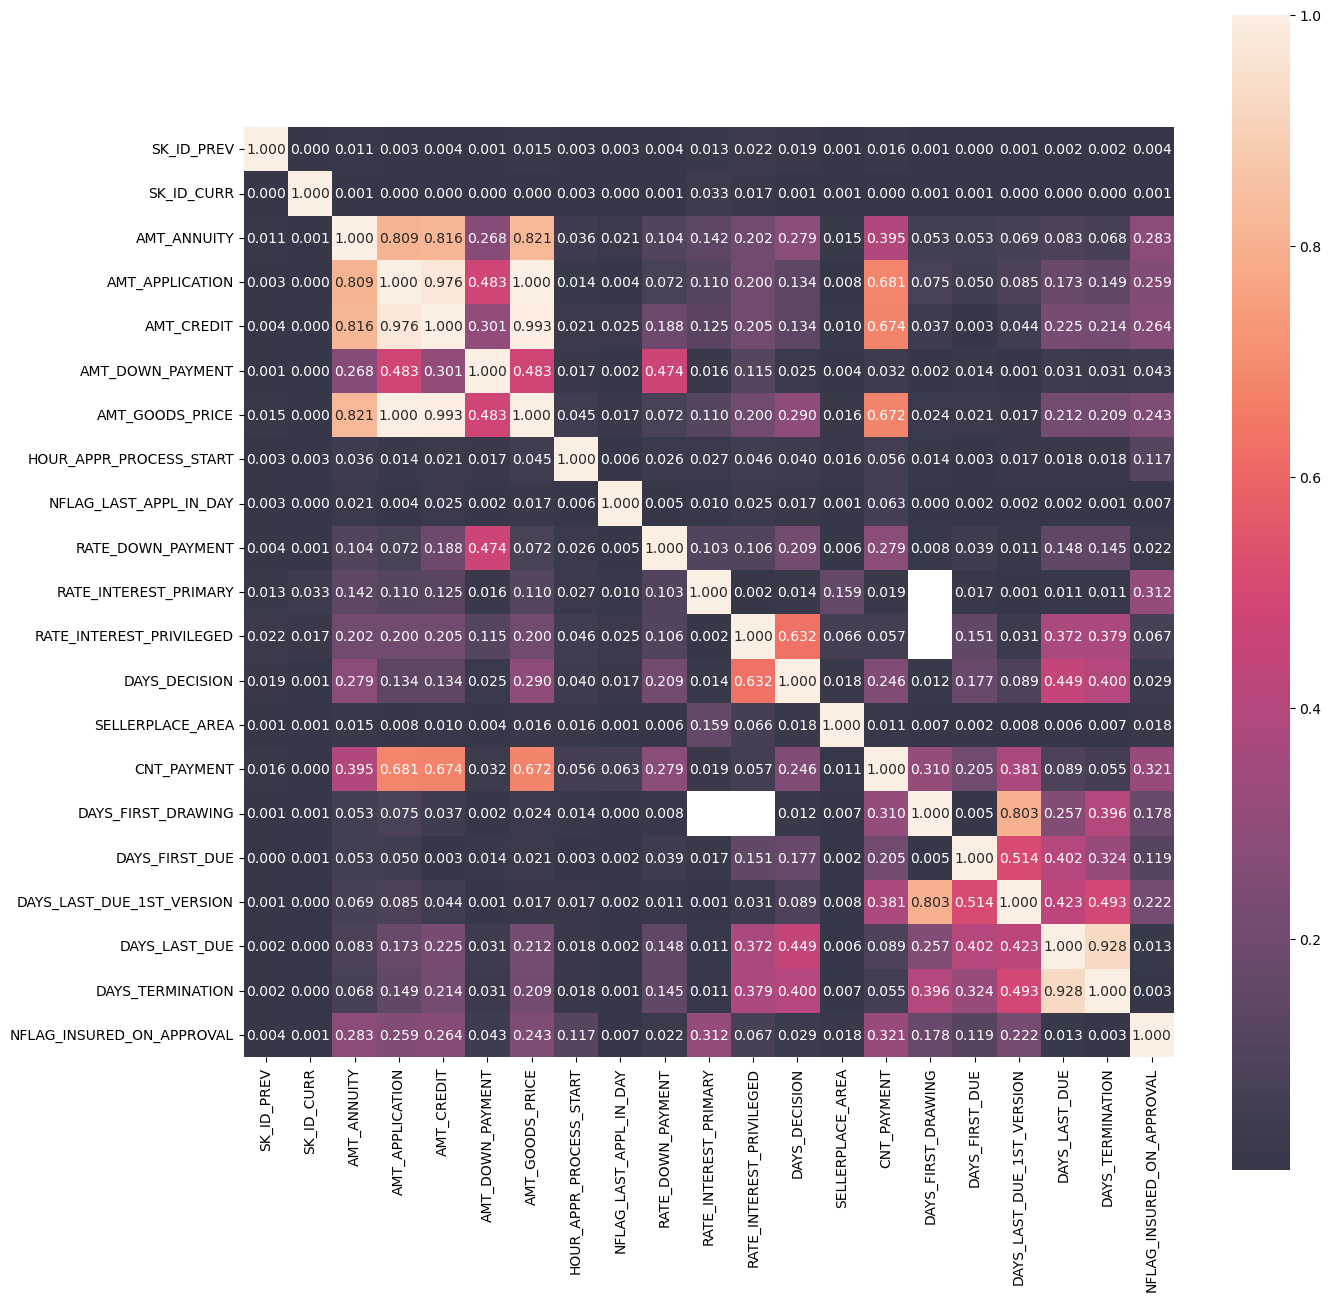

In [56]:
plt.figure(figsize = (15,15))
sns.heatmap(abs(pre_app.corr()), annot = True, cmap="rocket" , alpha = 0.8 , fmt = ".3f", square = True)

In [57]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


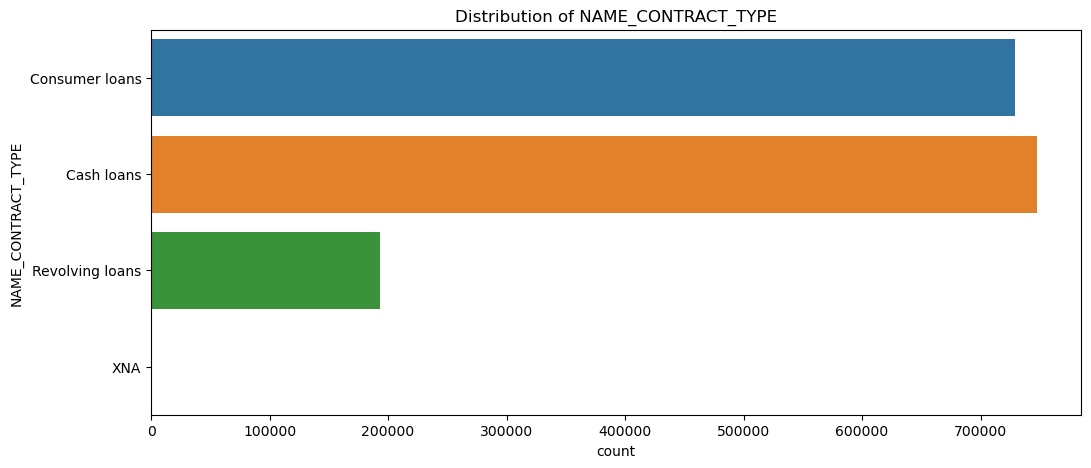

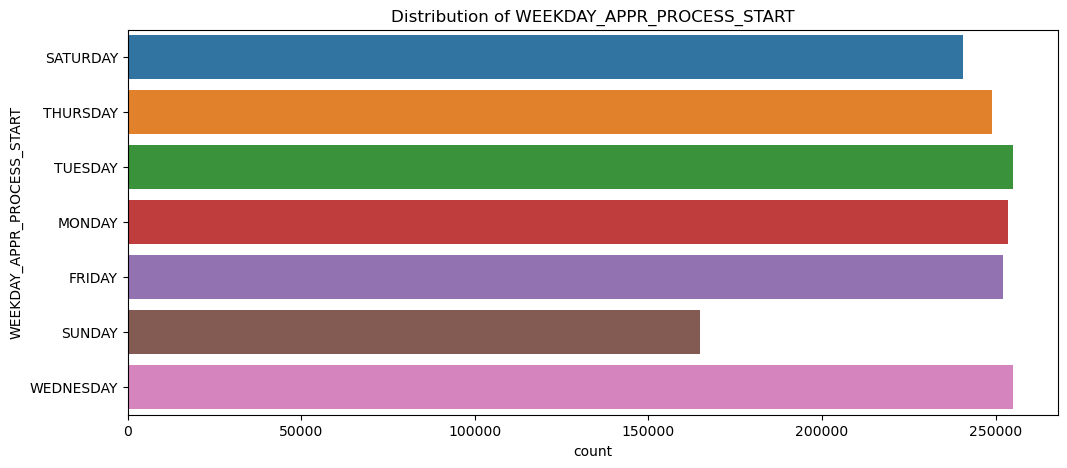

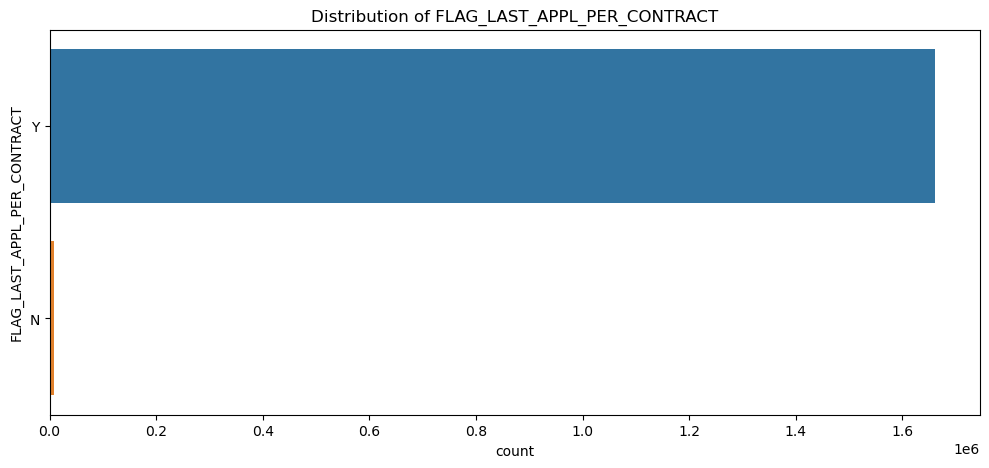

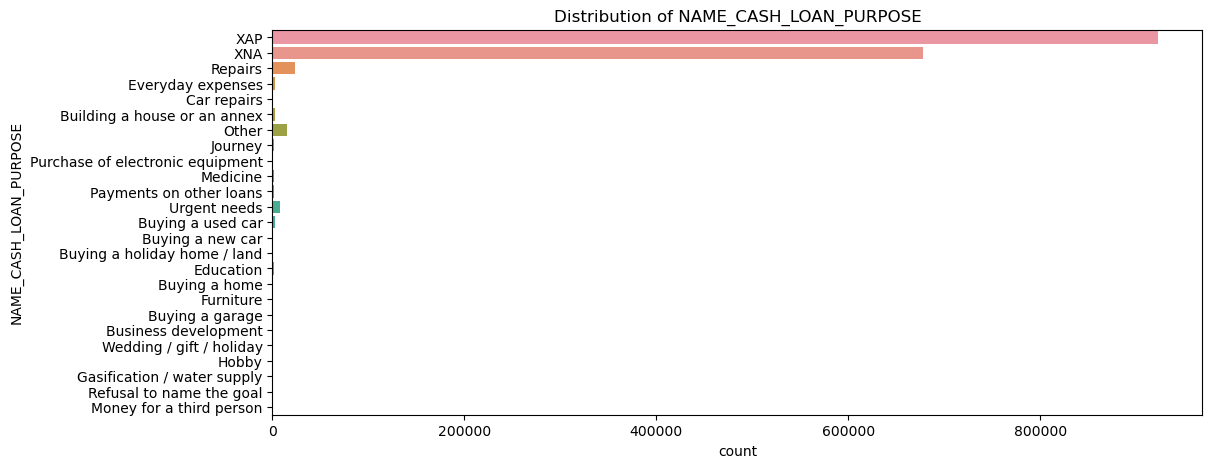

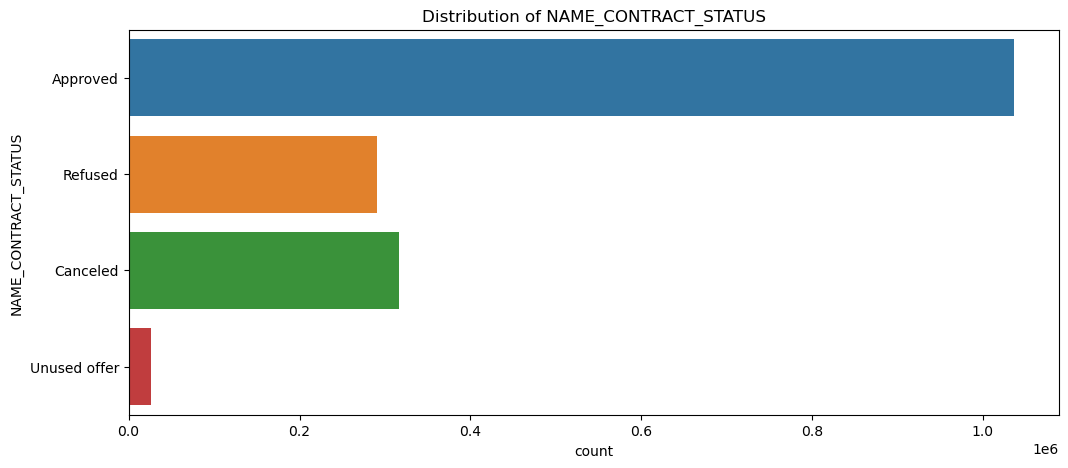

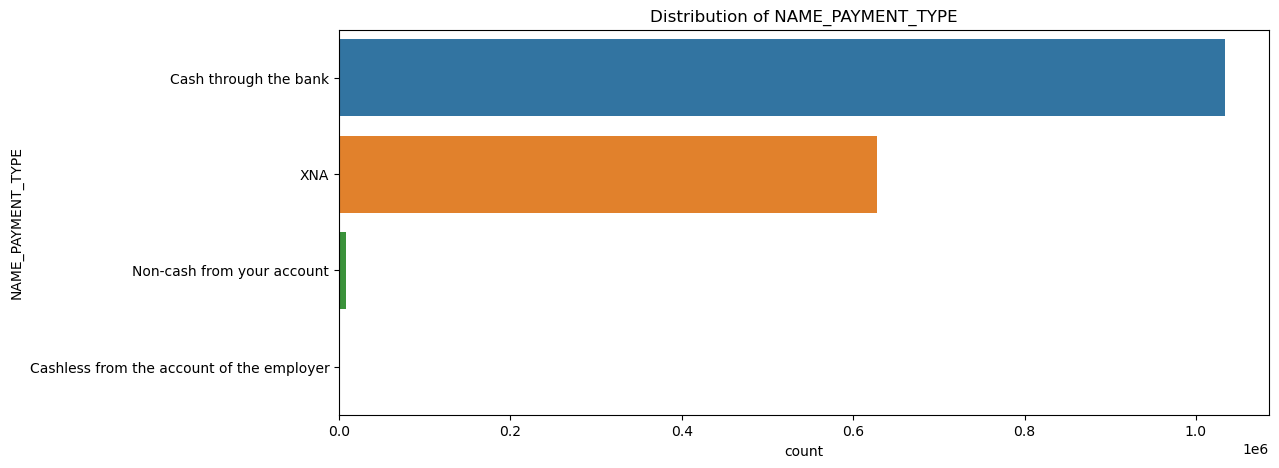

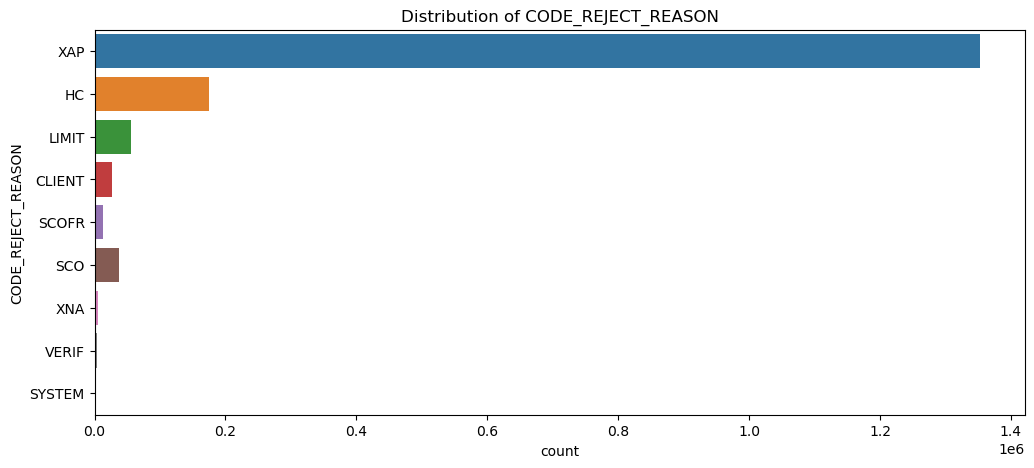

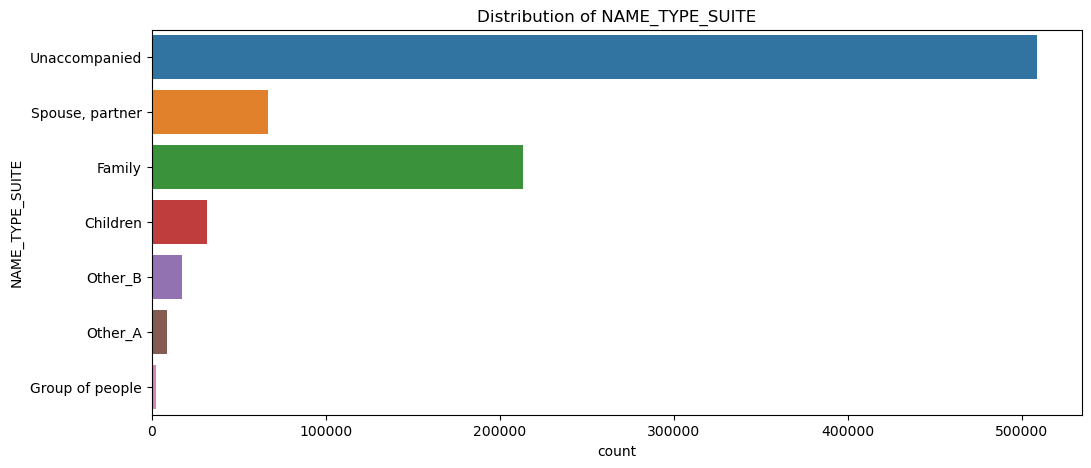

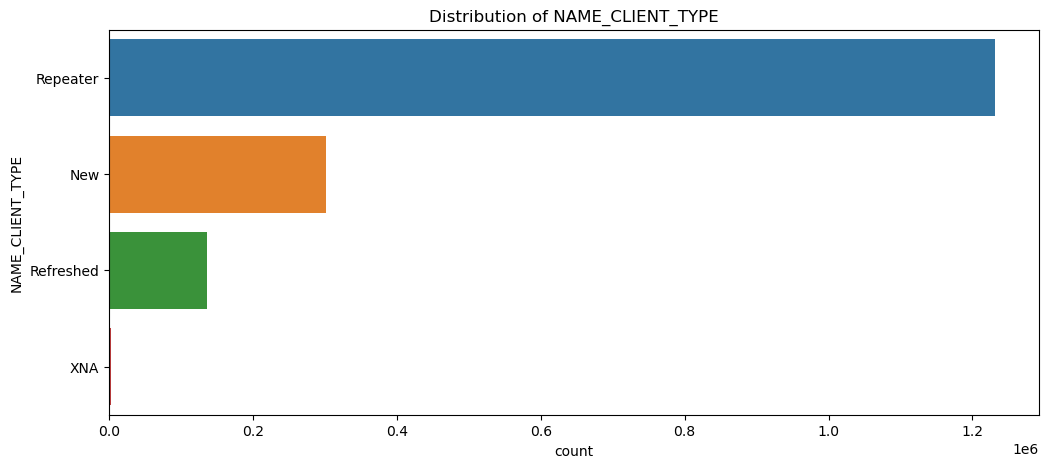

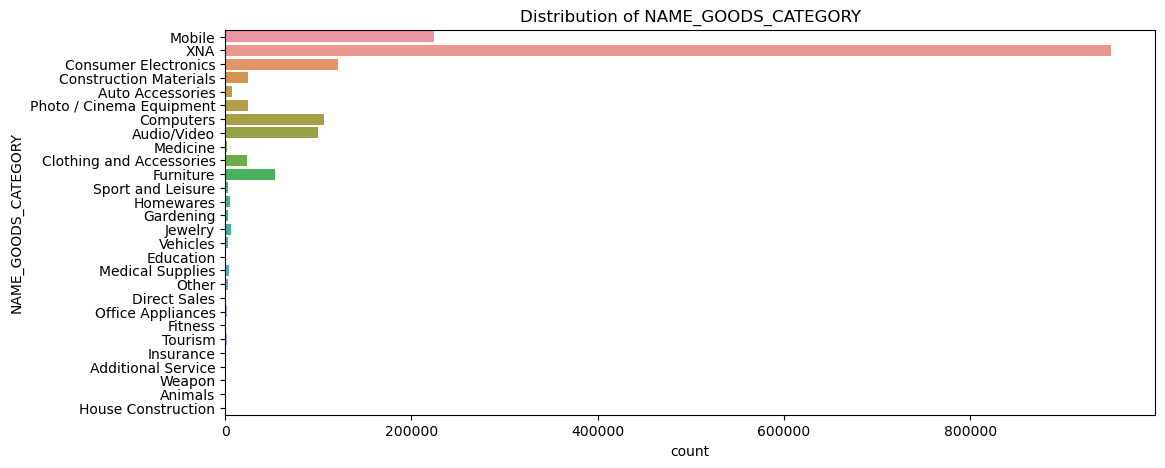

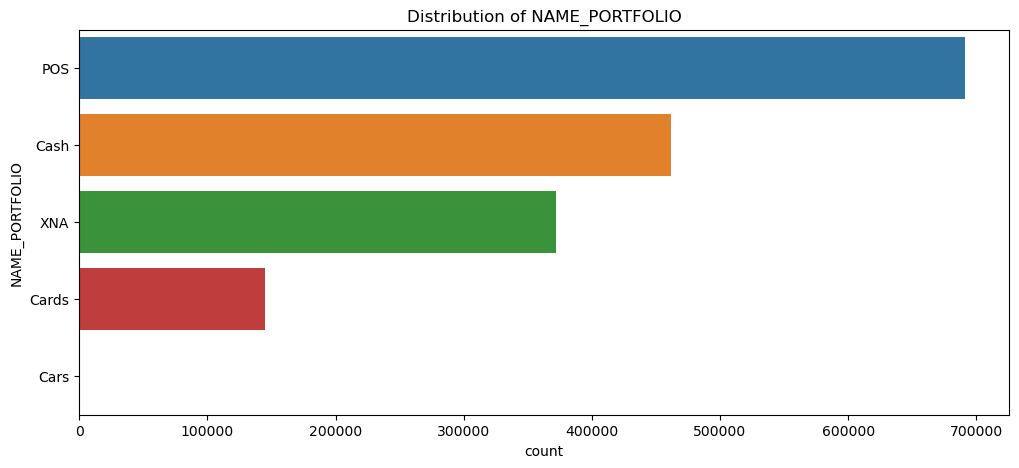

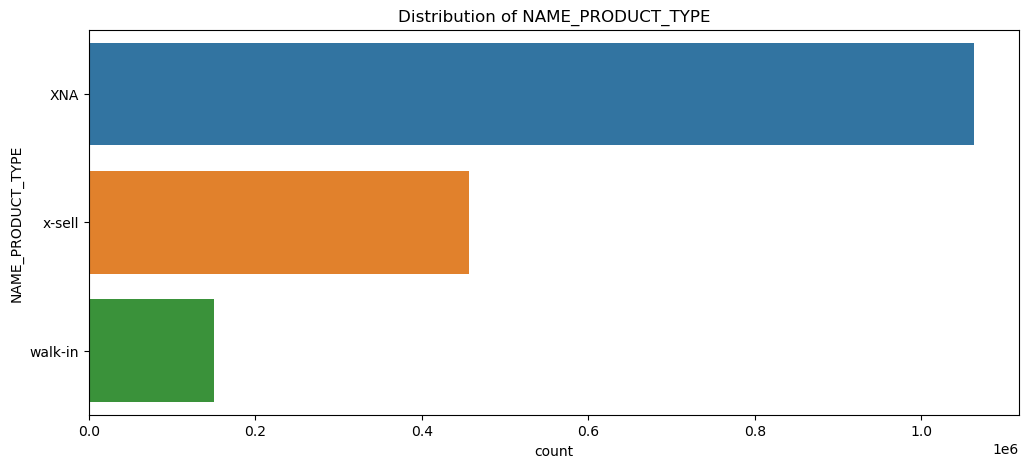

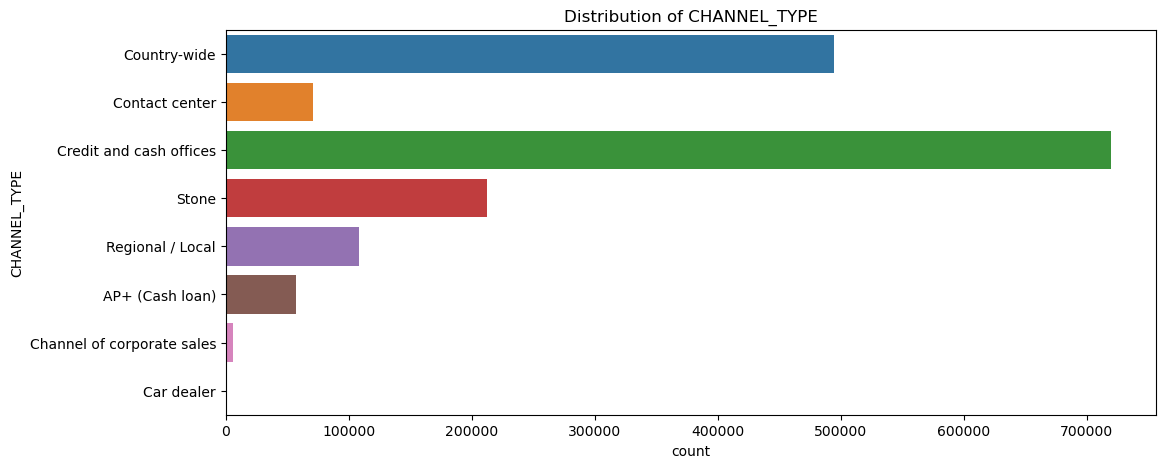

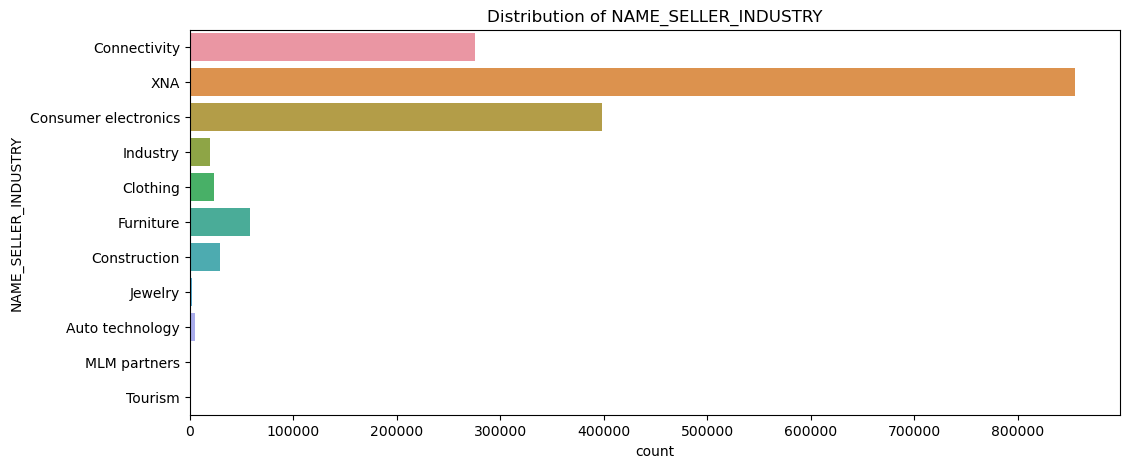

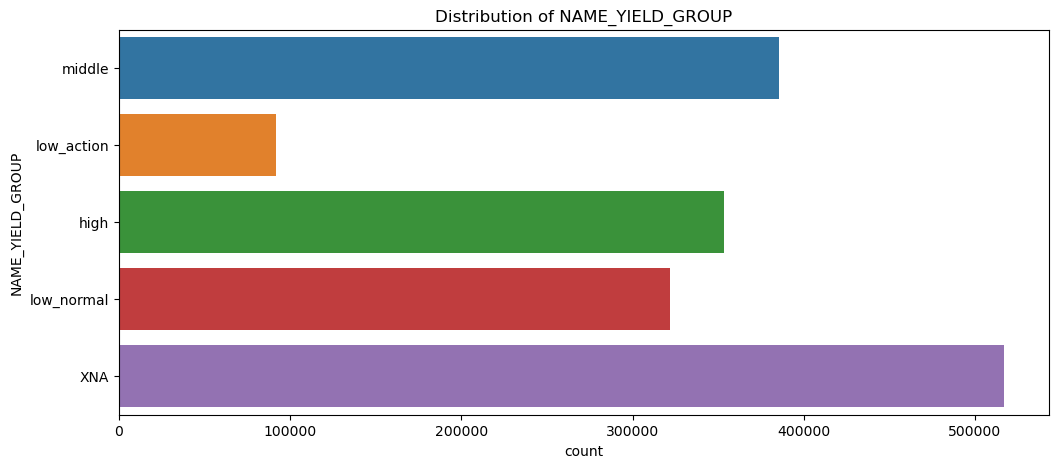

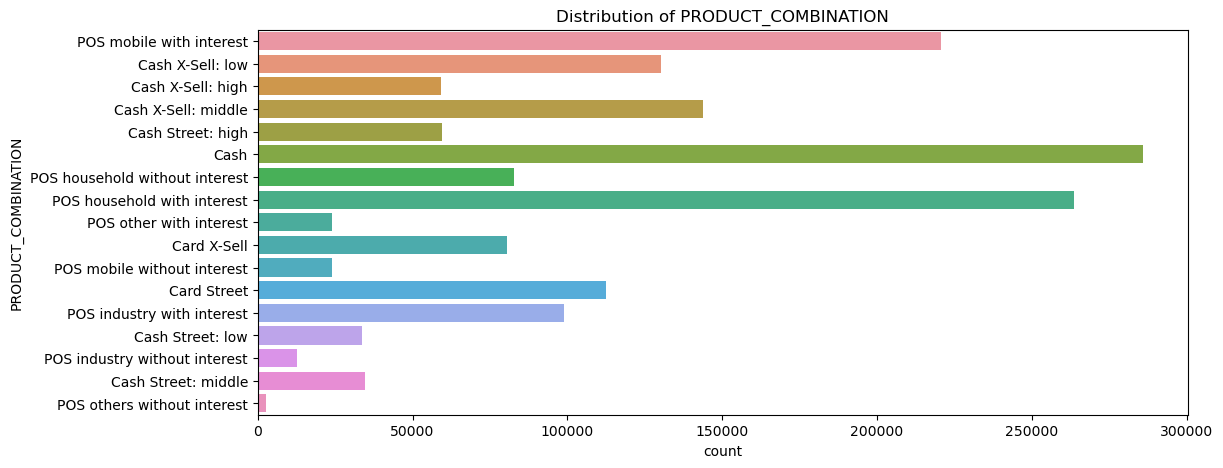

In [58]:
obj_col = pre_app.select_dtypes(['object']).columns.to_list()
for feature in obj_col:
    plt.figure(figsize=(12,5))
    sns.countplot(y = pre_app[feature])
    plt.title("Distribution of " + feature)

In [63]:
pre_app['DAYS_FIRST_DRAWING'].describe(percentiles=np.arange(0, .1, .05))

count    997149.000000
mean     342209.855039
std       88916.115833
min       -2922.000000
0%        -2922.000000
5%         -269.000000
50%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [70]:
pre_app[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE']].describe(percentiles=np.arange(.8, 1, .05))

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE
count,997149.000000,997149.000000,997149.000000,997149.000000
mean,342209.855039,13826.269337,33767.774054,76582.403064
std,88916.115833,72444.869708,106857.034789,149647.415123
min,-2922.000000,-2892.000000,-2801.000000,-2889.000000
50%,365243.000000,-831.000000,-361.000000,-537.000000
80%,365243.000000,-332.000000,267.000000,365243.000000
85%,365243.000000,-256.000000,518.000000,365243.000000
90%,365243.000000,-173.000000,1432.000000,365243.000000
95%,365243.000000,-48.000000,365243.000000,365243.000000
max,365243.000000,365243.000000,365243.000000,365243.000000


### DROP:
#### due to missing
RATE_INTEREST_PRIMARY

RATE_INTEREST_PRIVILEGED

CODE_REJECT_REASON

NAME_CASH_LOAN_PURPOSE

#### due to most freq
FLAG_LAST_APPL_PER_CONTRACT

NFLAG_LAST_APPL_IN_DAY

DAYS_FIRST_DRAWING
#### due to outliers
DAYS_FIRST_DUE 

DAYS_LAST_DUE_1ST_VERSION

DAYS_LAST_DUE

#### due to correlation
AMT_APPLICATION

AMT_GOODS_PRICE

DAYS_TERMINATION